In [1]:
import re
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

import periodicity_detection as pyd
from time_series_influences.utils import split_time_series, match_train_time_block_index
from time_series_influences.influence_functions import compute_loo_linear_approx
from time_series_influences.anomaly_detection import scale_influence_functions, eval_anomaly_detector, eval_anomaly_detector_all_thresholds

seed = 666
np.random.seed(seed)

filter SMAP and MSL data

In [2]:
dataset = "SMAP_MSL"
data_path = Path("../data/multivariate/") / dataset
test_df = pd.read_csv(data_path/"labeled_anomalies.csv")
smap_df = test_df.loc[test_df.spacecraft == "SMAP"]
# remove P-2 since anomaly transformer also removes this channel
smap_df = smap_df.loc[smap_df.chan_id != "P-2"]
msl_df = test_df.loc[test_df.spacecraft == "MSL"]

### SMAP

start detection for channel P-1 ..
anomaly ratio is 8.795 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8407/8407 [00:00<00:00, 23901.85it/s]


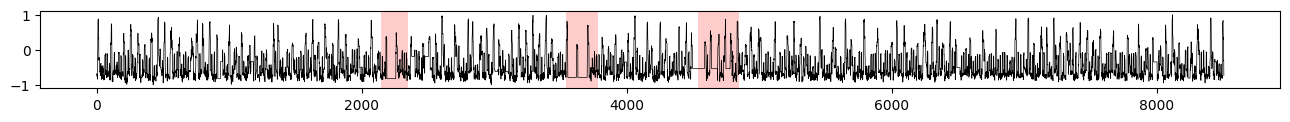

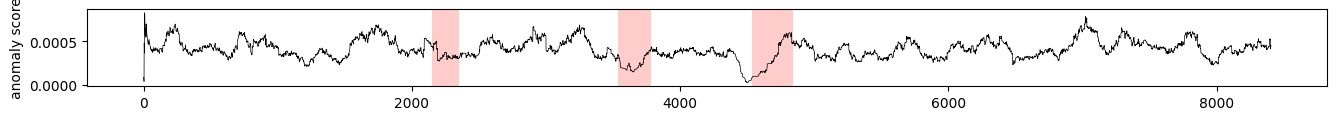

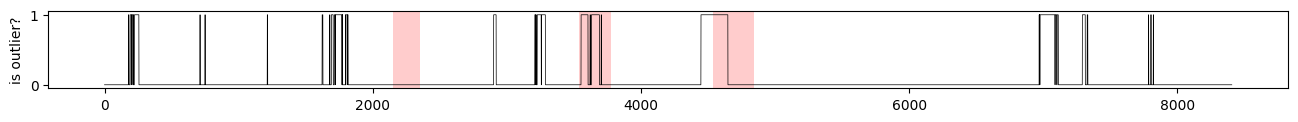

eval w/o point adjustment:
precision: 0.311 recall: 0.307 F1: 0.309 AUC: 0.762
eval with point adjustment:
precision: 0.518 recall: 0.733 F1: 0.607 AUC: 0.762
start detection for channel S-1 ..
anomaly ratio is 6.097 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7301/7301 [00:00<00:00, 80807.83it/s]


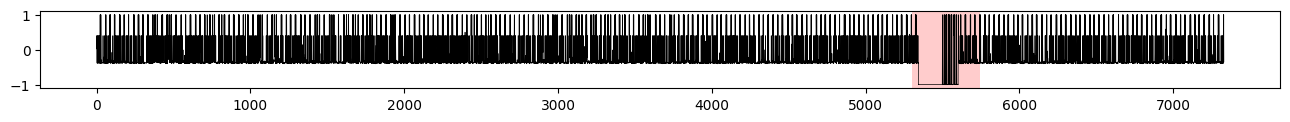

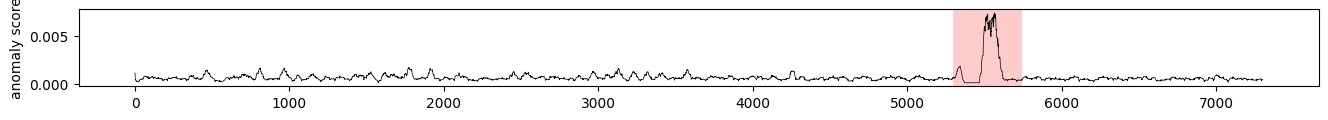

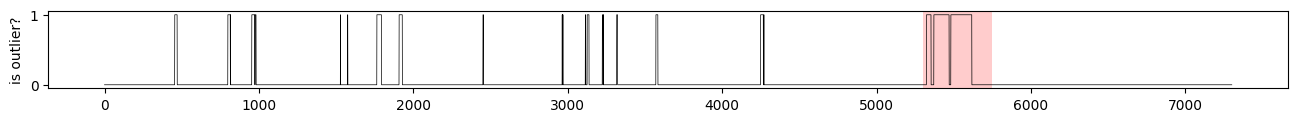

eval w/o point adjustment:
precision: 0.594 recall: 0.593 F1: 0.594 AUC: 0.877
eval with point adjustment:
precision: 0.712 recall: 1.000 F1: 0.832 AUC: 0.877
start detection for channel E-1 ..
anomaly ratio is 5.942 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8418/8418 [00:00<00:00, 23787.65it/s]


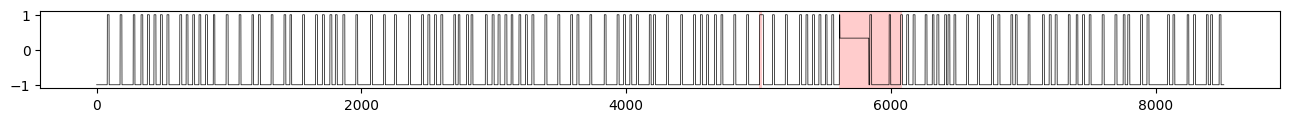

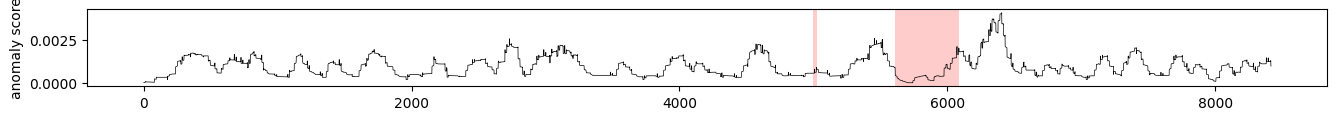

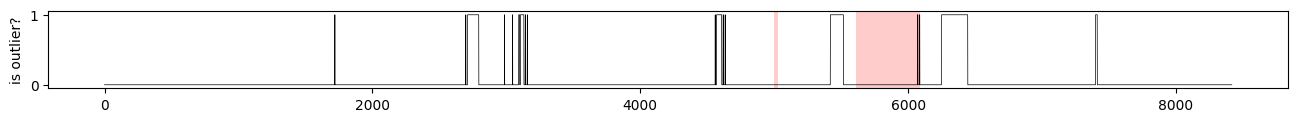

eval w/o point adjustment:
precision: 0.010 recall: 0.010 F1: 0.010 AUC: 0.700
eval with point adjustment:
precision: 0.497 recall: 0.941 F1: 0.651 AUC: 0.700
start detection for channel E-2 ..
anomaly ratio is 16.374 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8434/8434 [00:00<00:00, 22401.35it/s]


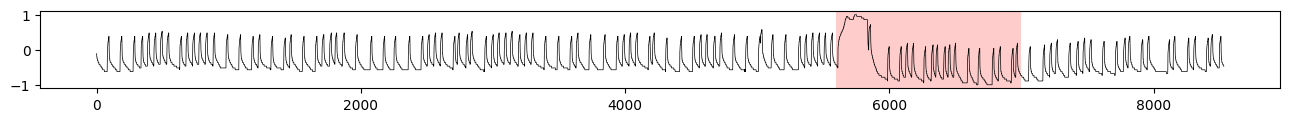

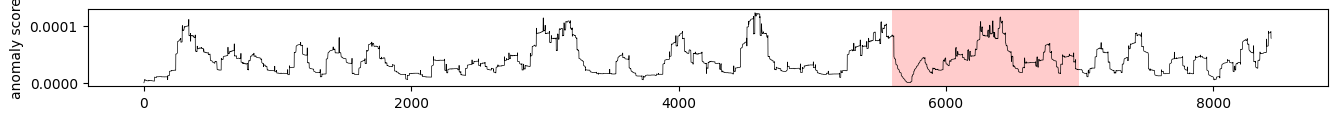

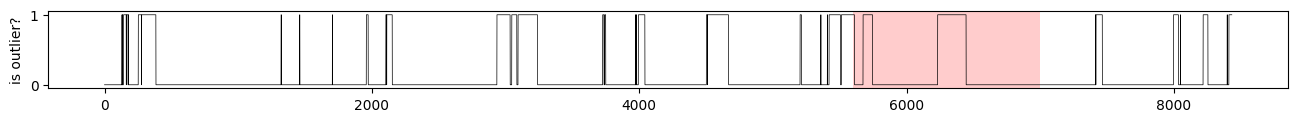

eval w/o point adjustment:
precision: 0.215 recall: 0.213 F1: 0.214 AUC: 0.437
eval with point adjustment:
precision: 0.563 recall: 1.000 F1: 0.720 AUC: 0.437
start detection for channel E-3 ..
anomaly ratio is 38.666 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8277/8277 [00:00<00:00, 82206.79it/s]


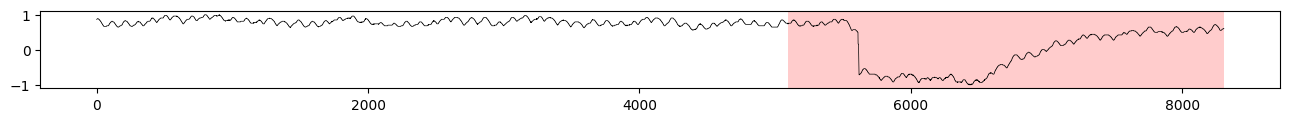

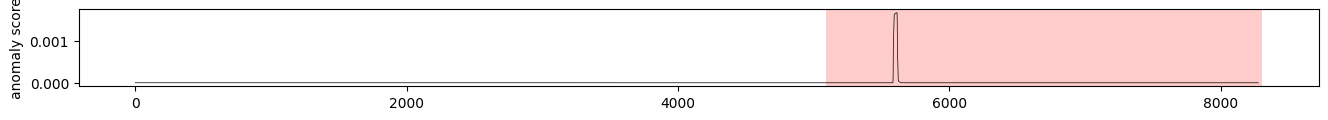

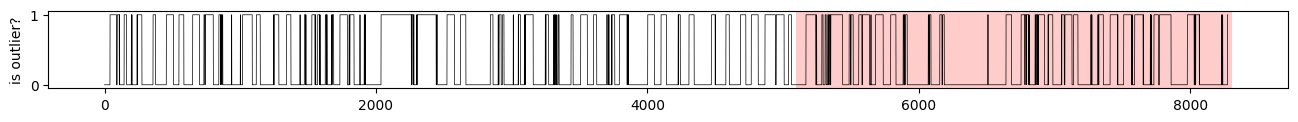

eval w/o point adjustment:
precision: 0.376 recall: 0.378 F1: 0.377 AUC: 0.456
eval with point adjustment:
precision: 0.614 recall: 1.000 F1: 0.761 AUC: 0.456
start detection for channel E-4 ..
anomaly ratio is 33.649 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8256/8256 [00:00<00:00, 21290.37it/s]


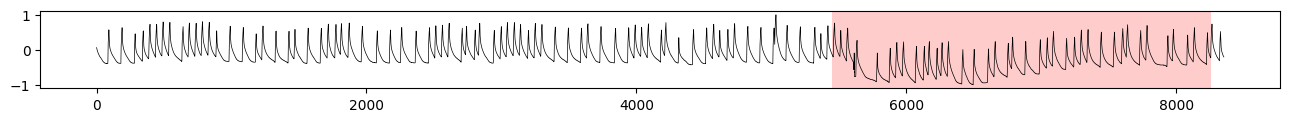

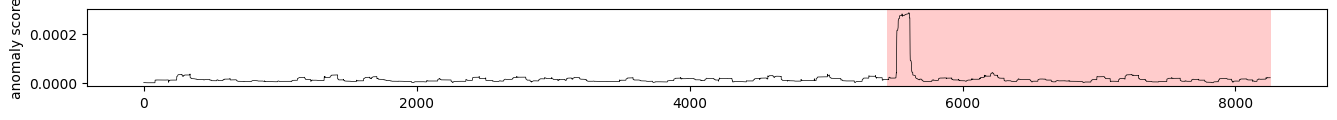

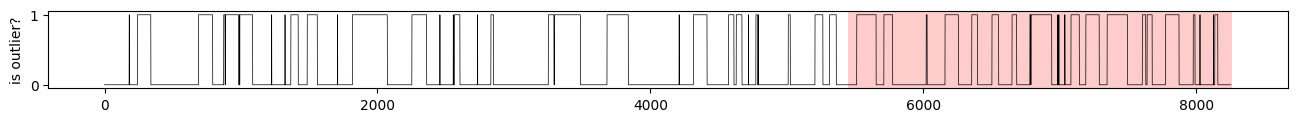

eval w/o point adjustment:
precision: 0.399 recall: 0.395 F1: 0.397 AUC: 0.521
eval with point adjustment:
precision: 0.627 recall: 1.000 F1: 0.771 AUC: 0.521
start detection for channel E-5 ..
anomaly ratio is 3.858 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8196/8196 [00:00<00:00, 21929.99it/s]


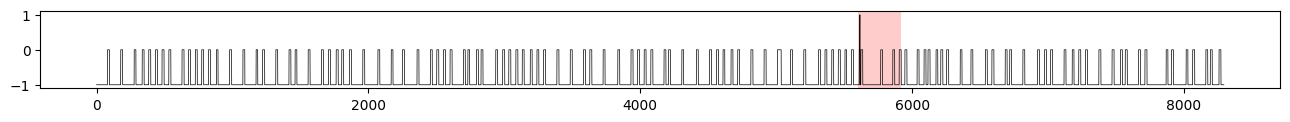

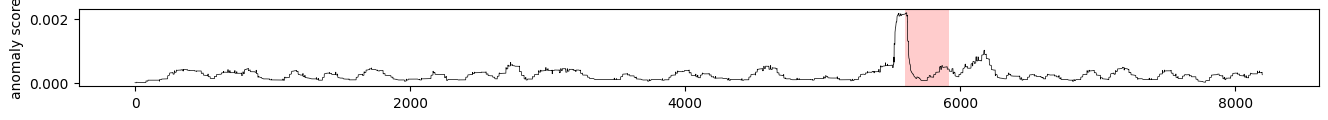

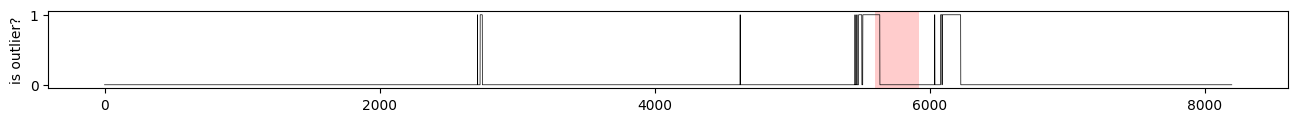

eval w/o point adjustment:
precision: 0.117 recall: 0.116 F1: 0.116 AUC: 0.618
eval with point adjustment:
precision: 0.533 recall: 1.000 F1: 0.696 AUC: 0.618
start detection for channel E-6 ..
anomaly ratio is 0.783 %.
block length is 97 time points.


Compute LOO: 100%|███████████████████████| 8203/8203 [00:00<00:00, 21887.80it/s]


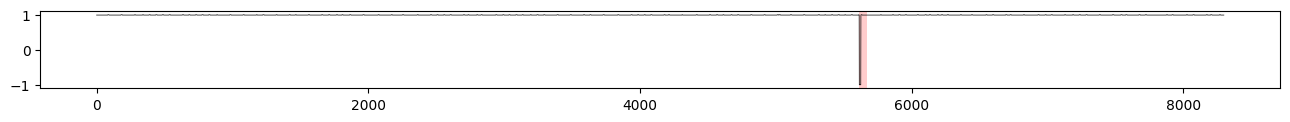

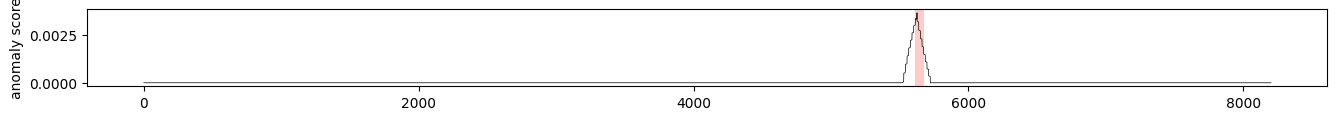

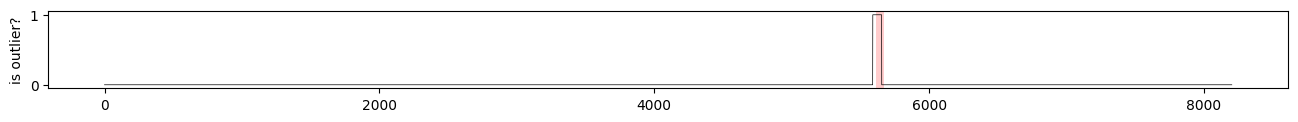

eval w/o point adjustment:
precision: 0.692 recall: 0.692 F1: 0.692 AUC: 0.999
eval with point adjustment:
precision: 0.765 recall: 1.000 F1: 0.867 AUC: 0.999
start detection for channel E-7 ..
anomaly ratio is 3.369 %.
block length is 102 time points.


Compute LOO: 100%|███████████████████████| 8208/8208 [00:00<00:00, 23650.09it/s]


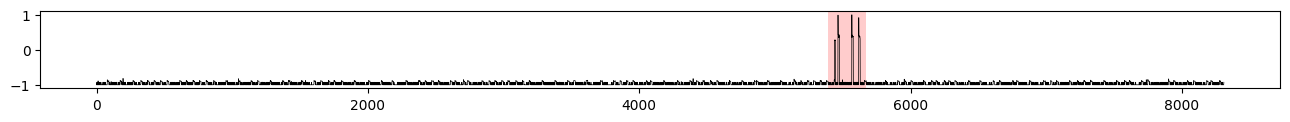

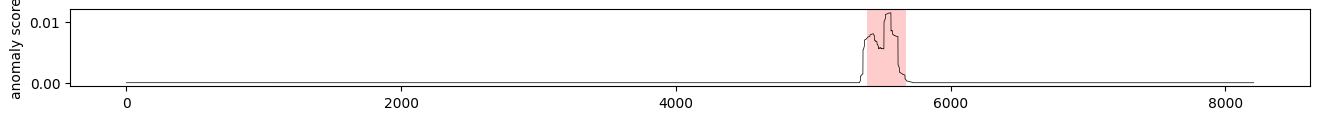

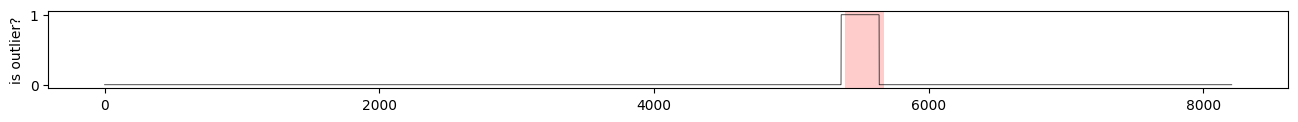

eval w/o point adjustment:
precision: 0.888 recall: 0.879 F1: 0.883 AUC: 0.998
eval with point adjustment:
precision: 0.900 recall: 1.000 F1: 0.948 AUC: 0.998
start detection for channel E-8 ..
anomaly ratio is 7.290 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8434/8434 [00:00<00:00, 24749.17it/s]


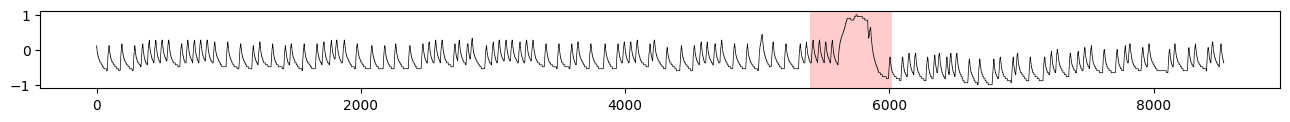

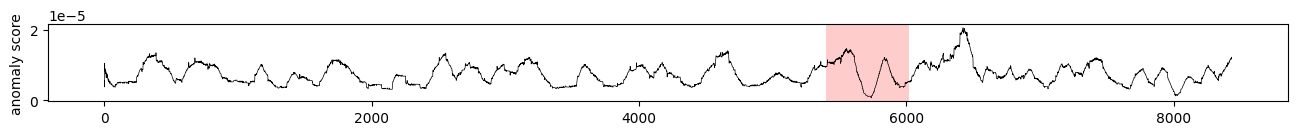

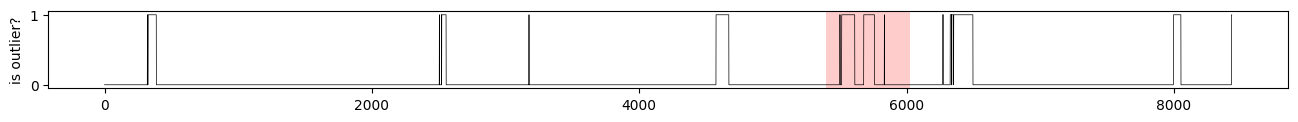

eval w/o point adjustment:
precision: 0.304 recall: 0.301 F1: 0.302 AUC: 0.737
eval with point adjustment:
precision: 0.592 recall: 1.000 F1: 0.744 AUC: 0.737
start detection for channel E-9 ..
anomaly ratio is 4.216 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8204/8204 [00:00<00:00, 23487.85it/s]


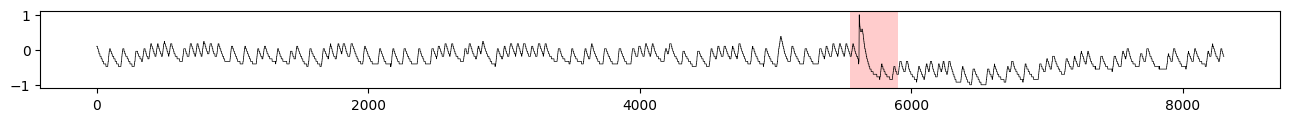

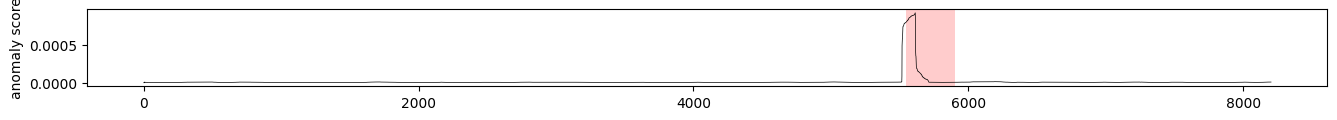

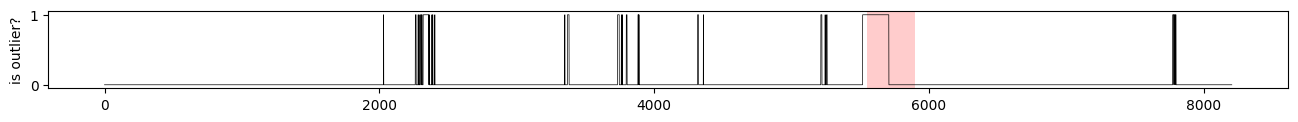

eval w/o point adjustment:
precision: 0.457 recall: 0.451 F1: 0.454 AUC: 0.694
eval with point adjustment:
precision: 0.651 recall: 1.000 F1: 0.788 AUC: 0.694
start detection for channel E-10 ..
anomaly ratio is 3.762 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8407/8407 [00:00<00:00, 22505.26it/s]


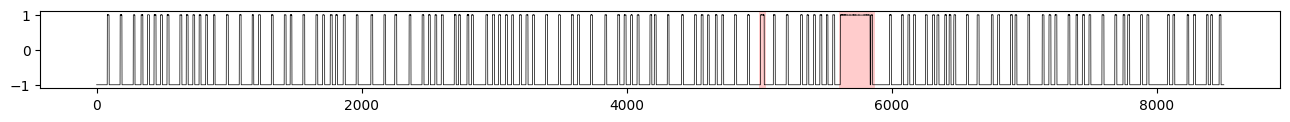

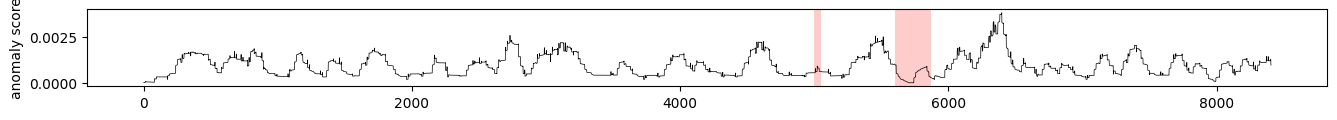

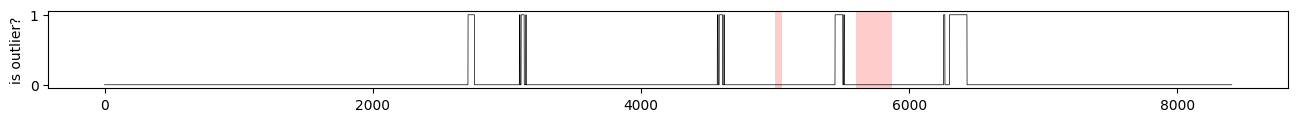

eval w/o point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.566
eval with point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.566
start detection for channel E-11 ..
anomaly ratio is 3.441 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8416/8416 [00:00<00:00, 23089.49it/s]


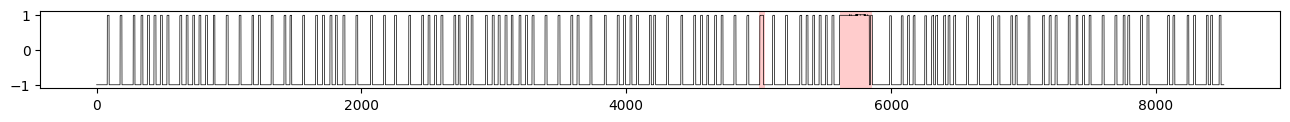

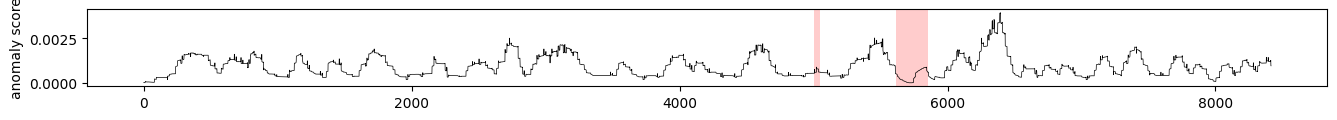

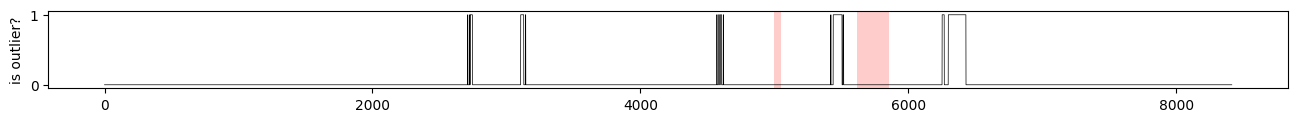

eval w/o point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.567
eval with point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.567
start detection for channel E-12 ..
anomaly ratio is 6.826 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8414/8414 [00:00<00:00, 24196.31it/s]


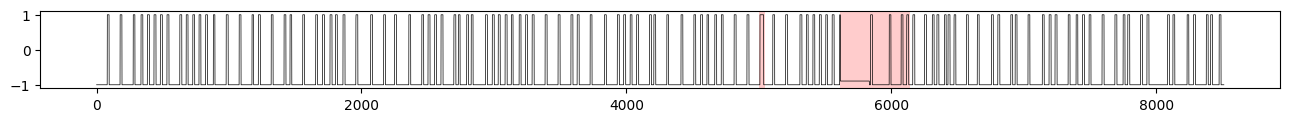

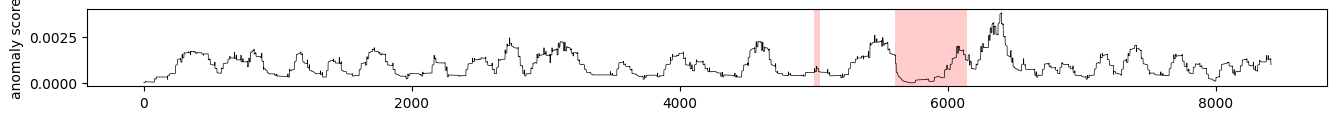

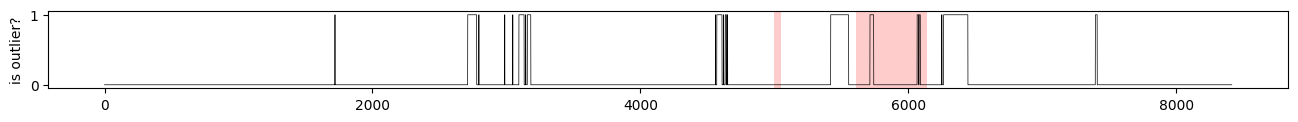

eval w/o point adjustment:
precision: 0.082 recall: 0.081 F1: 0.081 AUC: 0.718
eval with point adjustment:
precision: 0.501 recall: 0.914 F1: 0.648 AUC: 0.718
start detection for channel E-13 ..
anomaly ratio is 3.021 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8542/8542 [00:00<00:00, 23100.90it/s]


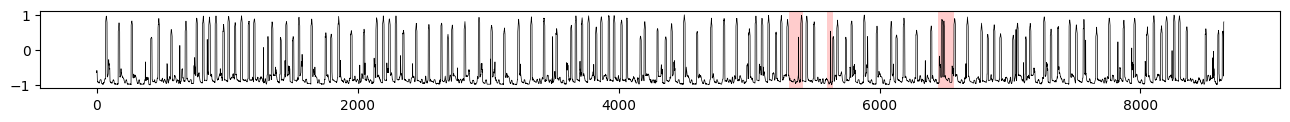

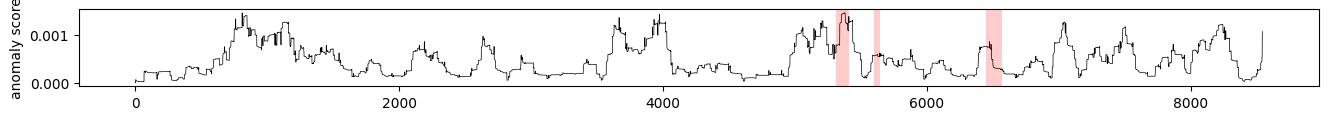

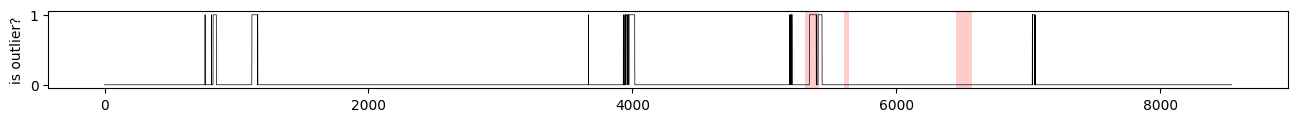

eval w/o point adjustment:
precision: 0.216 recall: 0.215 F1: 0.215 AUC: 0.543
eval with point adjustment:
precision: 0.332 recall: 0.387 F1: 0.358 AUC: 0.543
start detection for channel A-1 ..
anomaly ratio is 0.972 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8610/8610 [00:00<00:00, 80501.11it/s]


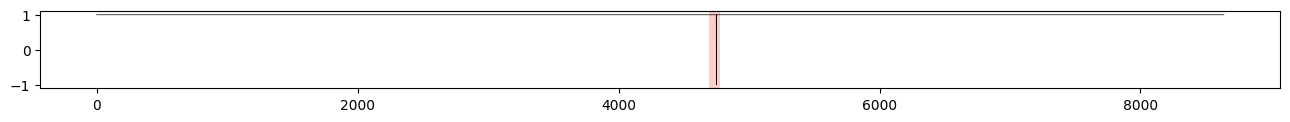

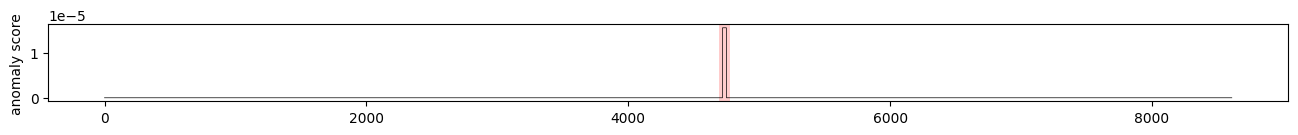

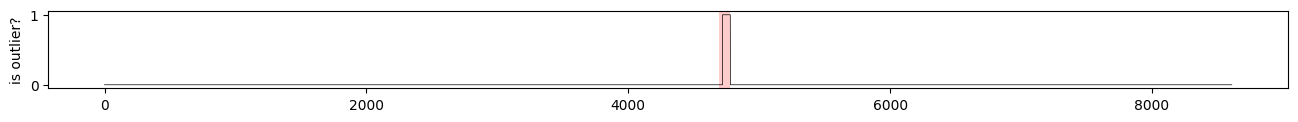

eval w/o point adjustment:
precision: 0.900 recall: 0.643 F1: 0.750 AUC: 0.822
eval with point adjustment:
precision: 0.933 recall: 1.000 F1: 0.966 AUC: 0.822
start detection for channel D-1 ..
anomaly ratio is 38.289 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8479/8479 [00:00<00:00, 80041.01it/s]


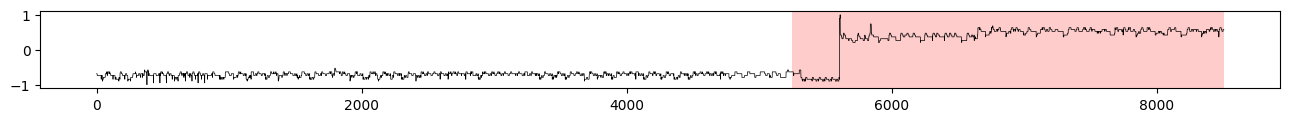

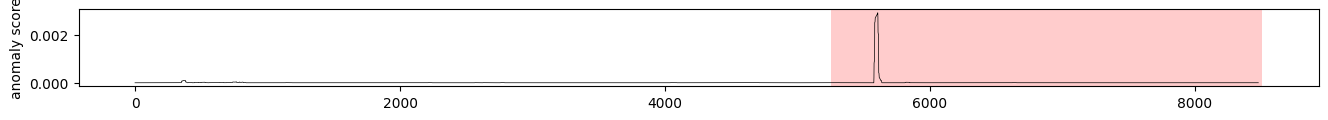

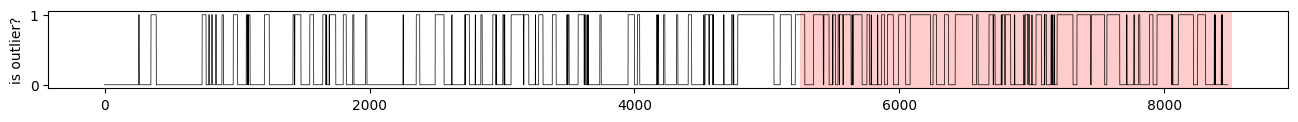

eval w/o point adjustment:
precision: 0.553 recall: 0.557 F1: 0.555 AUC: 0.704
eval with point adjustment:
precision: 0.690 recall: 1.000 F1: 0.817 AUC: 0.704
start detection for channel P-3 ..
anomaly ratio is 15.719 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8463/8463 [00:00<00:00, 81928.81it/s]


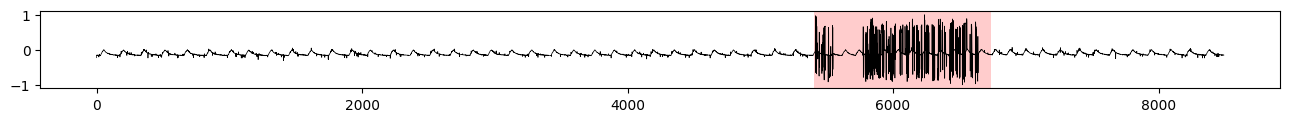

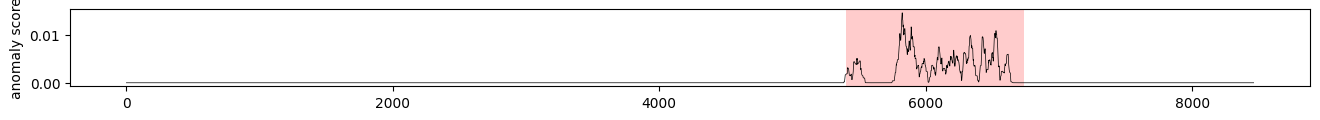

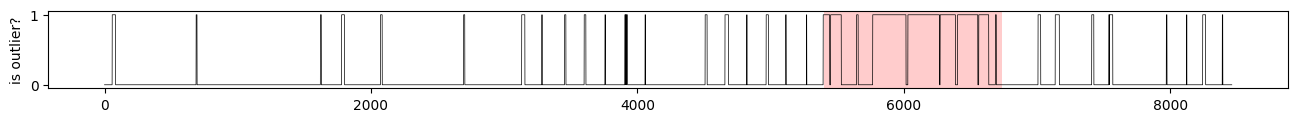

eval w/o point adjustment:
precision: 0.730 recall: 0.727 F1: 0.728 AUC: 0.817
eval with point adjustment:
precision: 0.788 recall: 1.000 F1: 0.881 AUC: 0.817
start detection for channel D-2 ..
anomaly ratio is 49.063 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8565/8565 [00:00<00:00, 80183.32it/s]


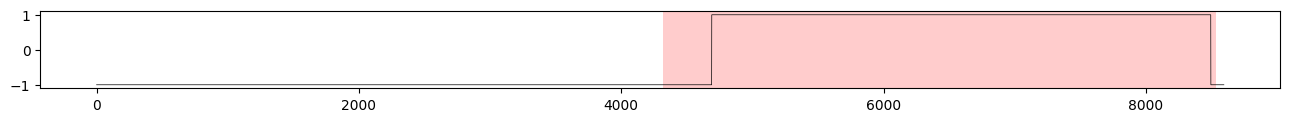

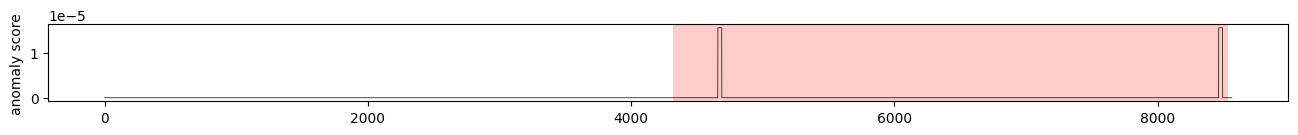

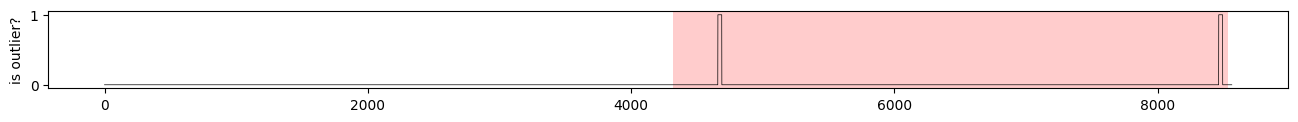

eval w/o point adjustment:
precision: 1.000 recall: 0.014 F1: 0.028 AUC: 0.063
eval with point adjustment:
precision: 1.000 recall: 1.000 F1: 1.000 AUC: 0.063
start detection for channel D-3 ..
anomaly ratio is 37.905 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8610/8610 [00:00<00:00, 79479.36it/s]


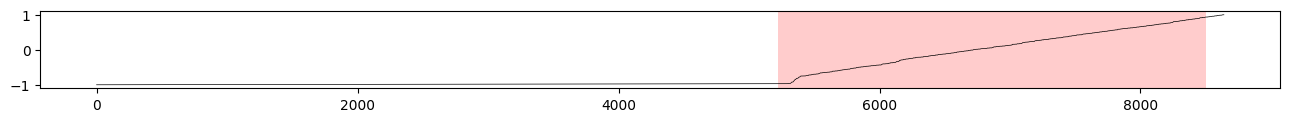

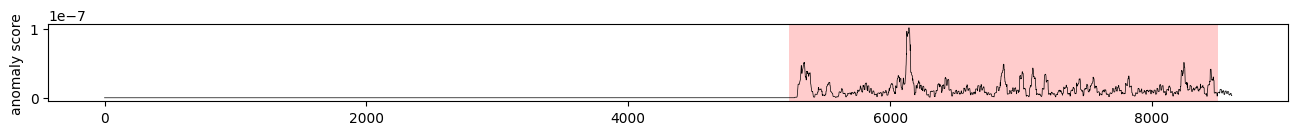

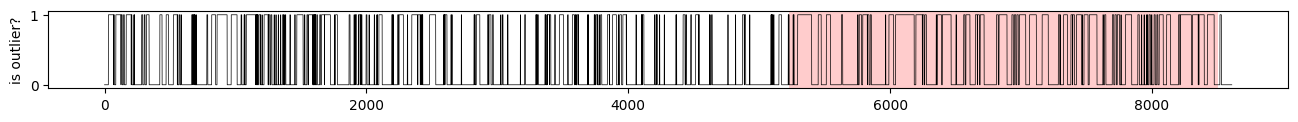

eval w/o point adjustment:
precision: 0.497 recall: 0.495 F1: 0.496 AUC: 0.505
eval with point adjustment:
precision: 0.666 recall: 1.000 F1: 0.800 AUC: 0.505
start detection for channel D-4 ..
anomaly ratio is 38.322 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8443/8443 [00:00<00:00, 80955.46it/s]


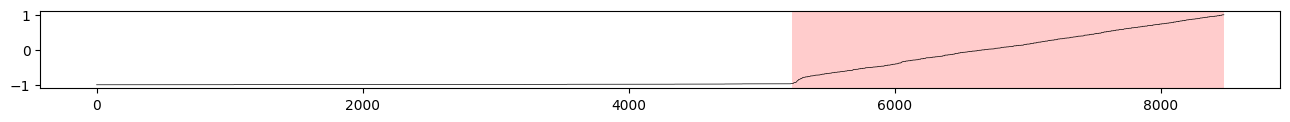

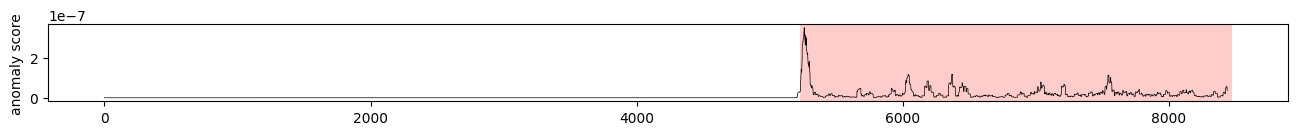

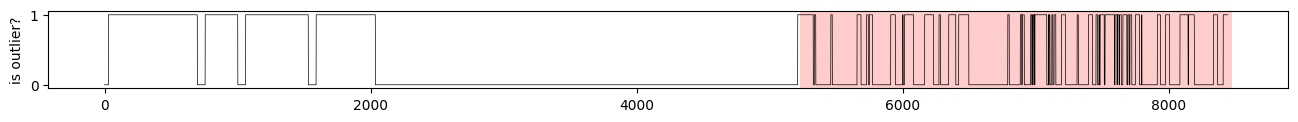

eval w/o point adjustment:
precision: 0.398 recall: 0.378 F1: 0.388 AUC: 0.382
eval with point adjustment:
precision: 0.636 recall: 1.000 F1: 0.777 AUC: 0.382
start detection for channel A-2 ..
anomaly ratio is 1.390 %.
block length is 90 time points.


Compute LOO: 100%|███████████████████████| 7824/7824 [00:00<00:00, 65343.65it/s]


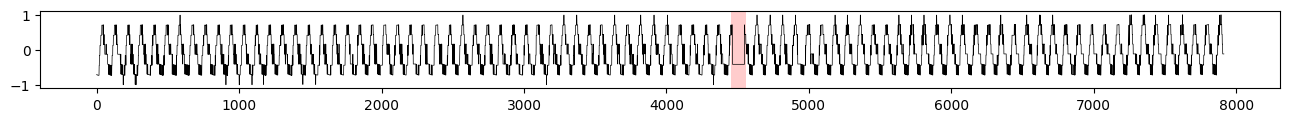

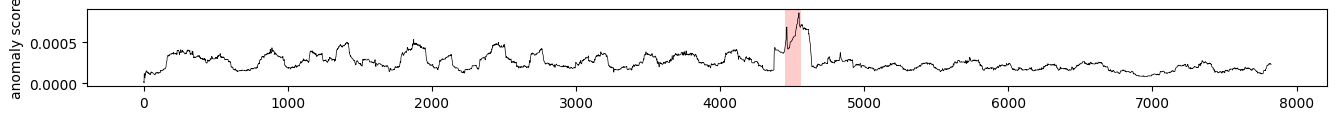

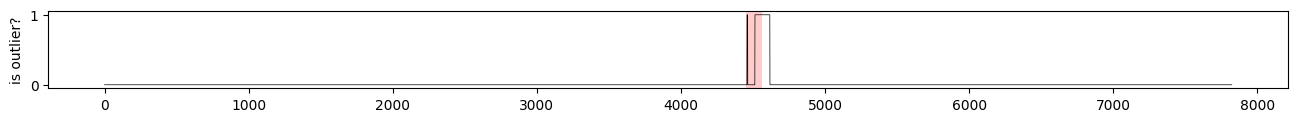

eval w/o point adjustment:
precision: 0.468 recall: 0.464 F1: 0.466 AUC: 0.988
eval with point adjustment:
precision: 0.655 recall: 1.000 F1: 0.791 AUC: 0.988
start detection for channel A-3 ..
anomaly ratio is 2.255 %.
block length is 93 time points.


Compute LOO: 100%|███████████████████████| 8112/8112 [00:00<00:00, 63668.03it/s]


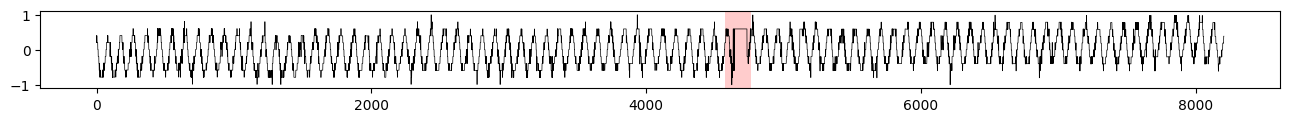

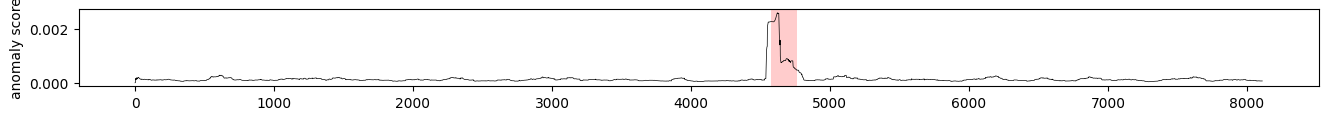

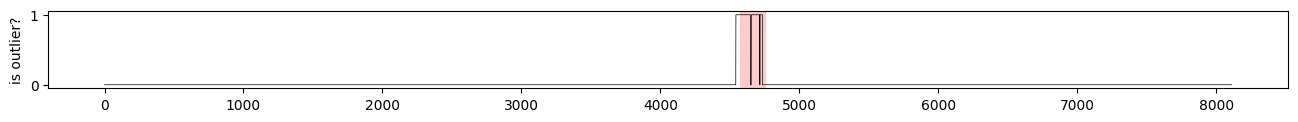

eval w/o point adjustment:
precision: 0.825 recall: 0.816 F1: 0.821 AUC: 0.997
eval with point adjustment:
precision: 0.853 recall: 1.000 F1: 0.920 AUC: 0.997
start detection for channel A-4 ..
anomaly ratio is 1.361 %.
block length is 92 time points.


Compute LOO: 100%|███████████████████████| 7988/7988 [00:00<00:00, 65236.51it/s]


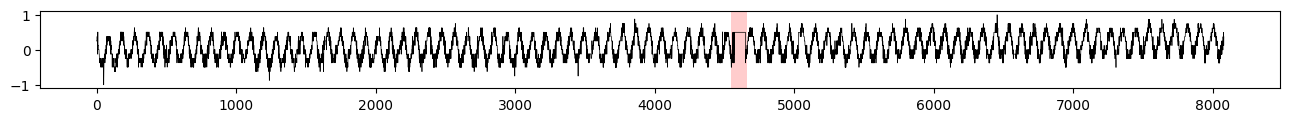

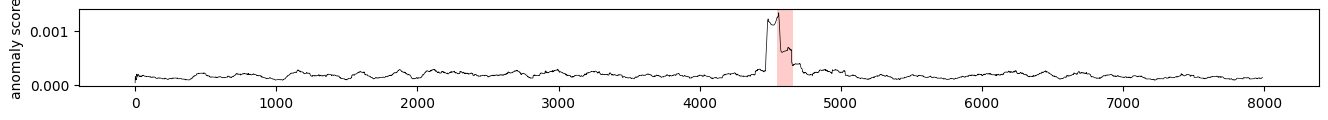

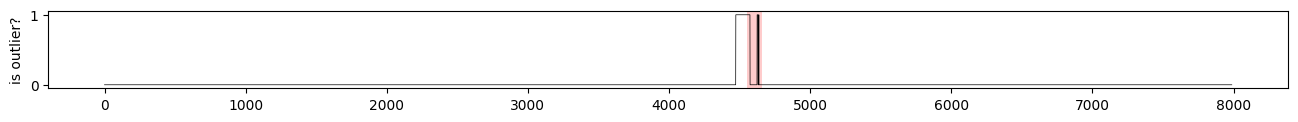

eval w/o point adjustment:
precision: 0.294 recall: 0.291 F1: 0.292 AUC: 0.991
eval with point adjustment:
precision: 0.588 recall: 1.000 F1: 0.741 AUC: 0.991
start detection for channel G-1 ..
anomaly ratio is 1.417 %.
block length is 95 time points.


Compute LOO: 100%|███████████████████████| 8374/8374 [00:00<00:00, 63973.01it/s]


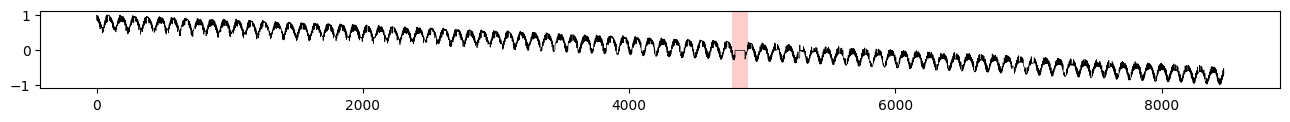

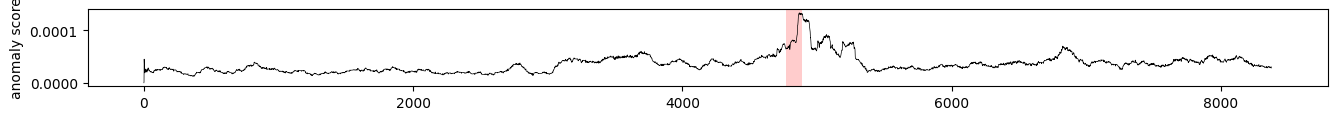

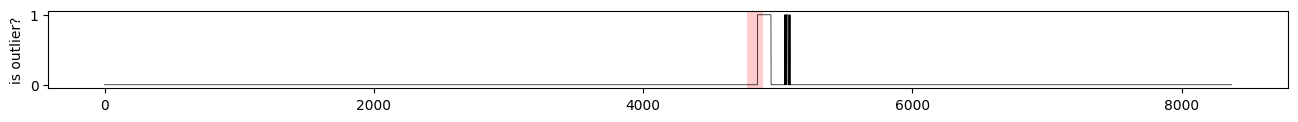

eval w/o point adjustment:
precision: 0.336 recall: 0.333 F1: 0.335 AUC: 0.983
eval with point adjustment:
precision: 0.603 recall: 1.000 F1: 0.752 AUC: 0.983
start detection for channel G-2 ..
anomaly ratio is 0.543 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7331/7331 [00:00<00:00, 80590.56it/s]


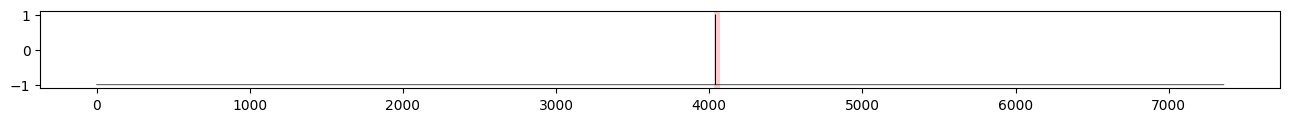

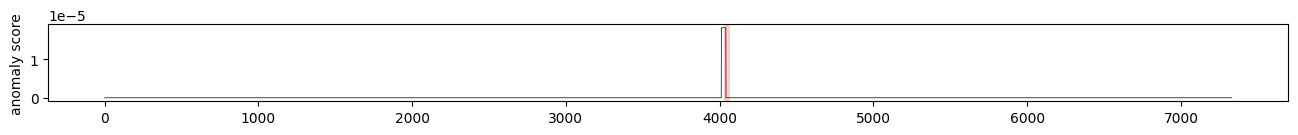

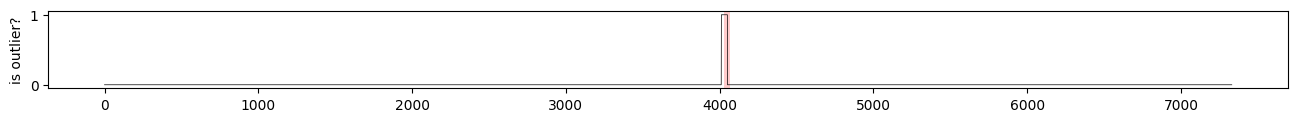

eval w/o point adjustment:
precision: 0.525 recall: 0.525 F1: 0.525 AUC: 0.997
eval with point adjustment:
precision: 0.678 recall: 1.000 F1: 0.808 AUC: 0.997
start detection for channel D-5 ..
anomaly ratio is 0.655 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7598/7598 [00:00<00:00, 81859.94it/s]


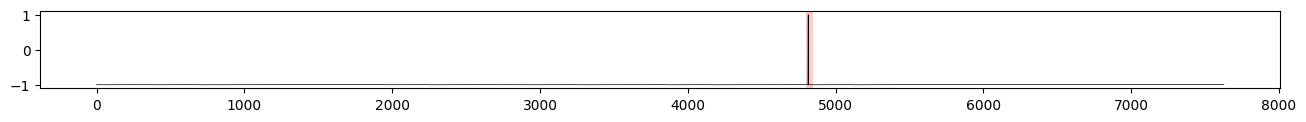

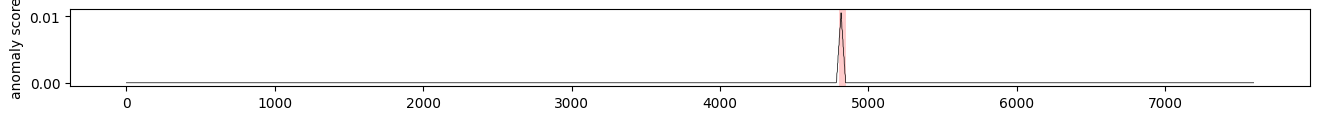

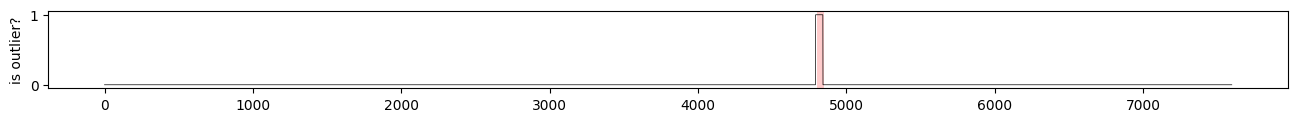

eval w/o point adjustment:
precision: 0.840 recall: 0.840 F1: 0.840 AUC: 0.949
eval with point adjustment:
precision: 0.862 recall: 1.000 F1: 0.926 AUC: 0.949
start detection for channel D-6 ..
anomaly ratio is 1.015 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7854/7854 [00:00<00:00, 75166.60it/s]


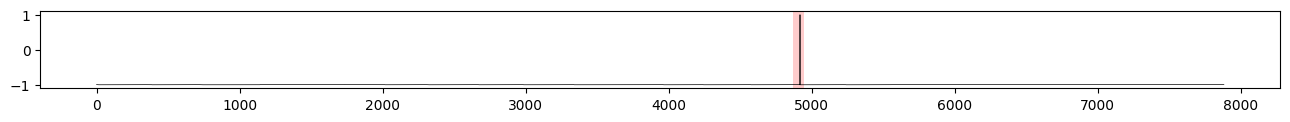

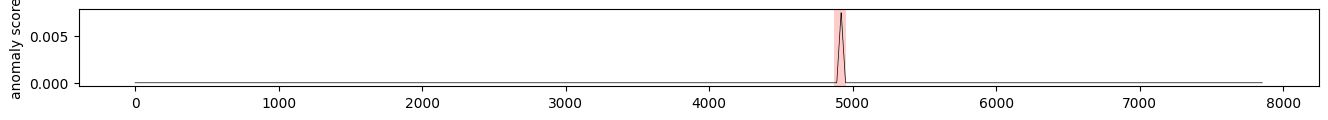

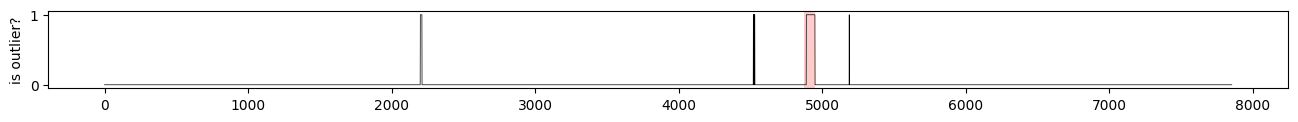

eval w/o point adjustment:
precision: 0.762 recall: 0.762 F1: 0.762 AUC: 0.913
eval with point adjustment:
precision: 0.808 recall: 1.000 F1: 0.894 AUC: 0.913
start detection for channel D-7 ..
anomaly ratio is 35.344 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7612/7612 [00:00<00:00, 80705.98it/s]


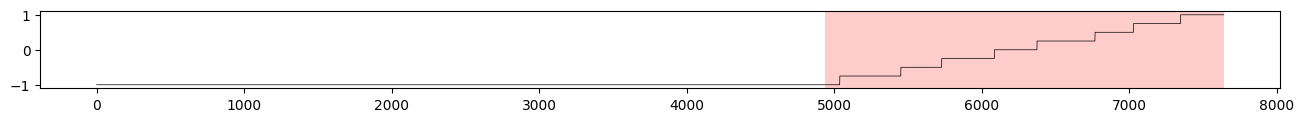

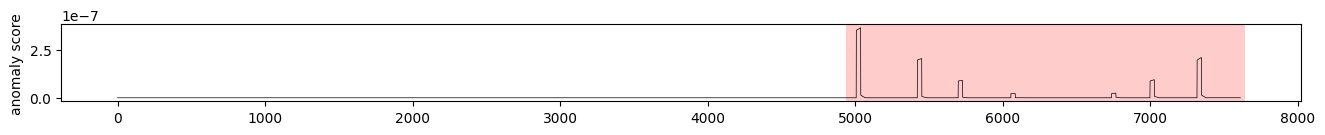

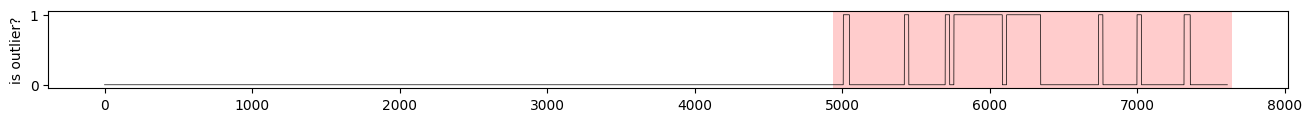

eval w/o point adjustment:
precision: 1.000 recall: 0.286 F1: 0.444 AUC: 0.303
eval with point adjustment:
precision: 1.000 recall: 1.000 F1: 1.000 AUC: 0.303
start detection for channel F-1 ..
anomaly ratio is 1.165 %.
block length is 10 time points.


Compute LOO: 100%|███████████████████████| 8574/8574 [00:00<00:00, 82576.45it/s]


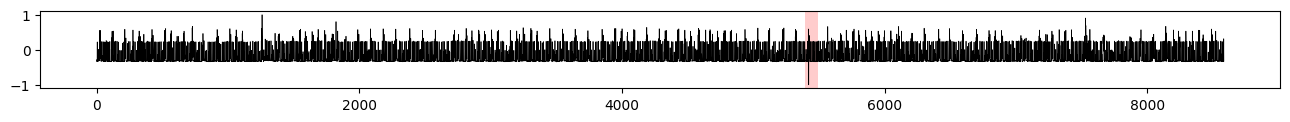

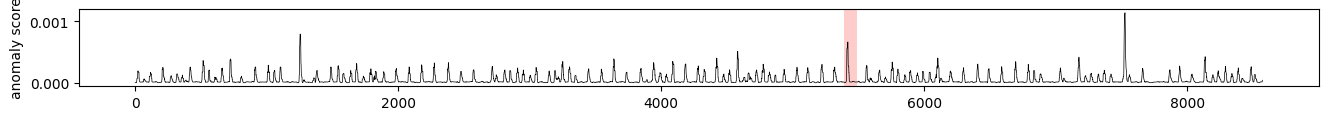

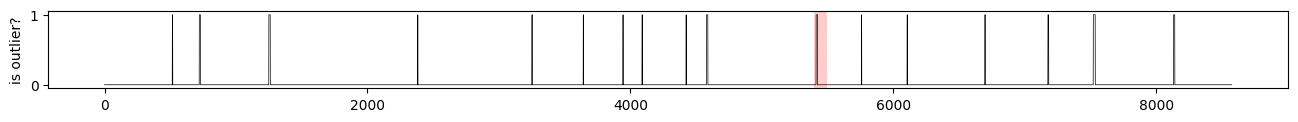

eval w/o point adjustment:
precision: 0.110 recall: 0.110 F1: 0.110 AUC: 0.534
eval with point adjustment:
precision: 0.529 recall: 1.000 F1: 0.692 AUC: 0.534
start detection for channel P-4 ..
anomaly ratio is 5.653 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7753/7753 [00:00<00:00, 81470.65it/s]


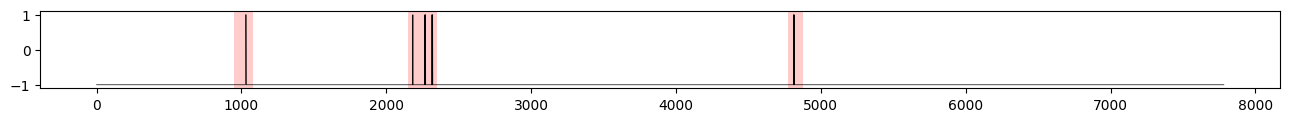

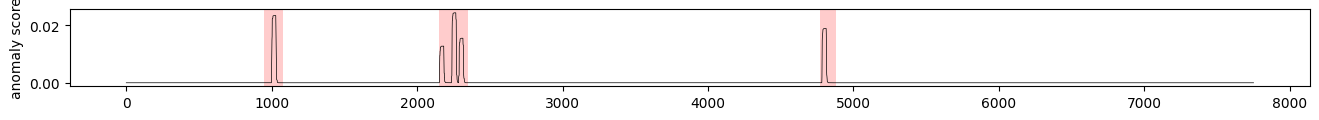

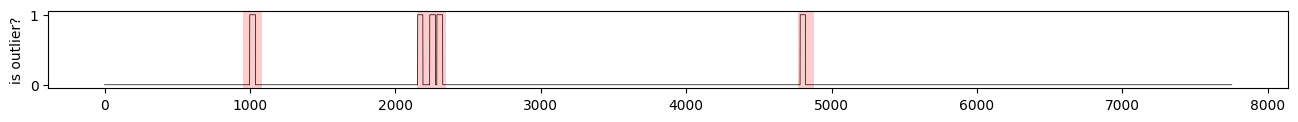

eval w/o point adjustment:
precision: 1.000 recall: 0.439 F1: 0.610 AUC: 0.597
eval with point adjustment:
precision: 1.000 recall: 1.000 F1: 1.000 AUC: 0.597
start detection for channel G-3 ..
anomaly ratio is 0.632 %.
block length is 421 time points.


Compute LOO: 100%|████████████████████████| 7486/7486 [00:00<00:00, 7743.10it/s]


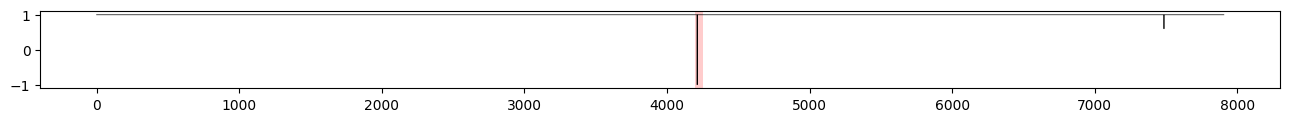

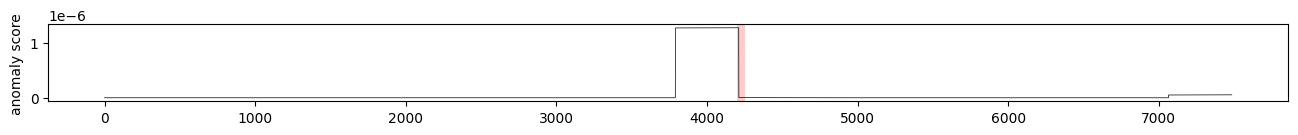

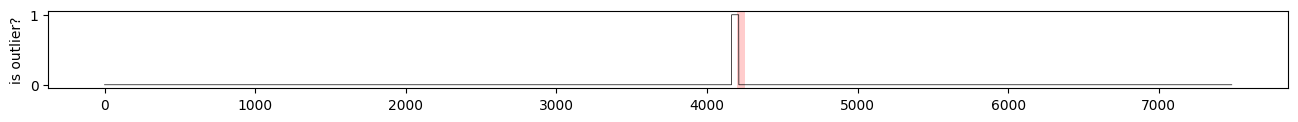

eval w/o point adjustment:
precision: 0.250 recall: 0.240 F1: 0.245 AUC: 0.326
eval with point adjustment:
precision: 0.581 recall: 1.000 F1: 0.735 AUC: 0.326
start detection for channel T-1 ..
anomaly ratio is 17.812 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8514/8514 [00:00<00:00, 22578.75it/s]


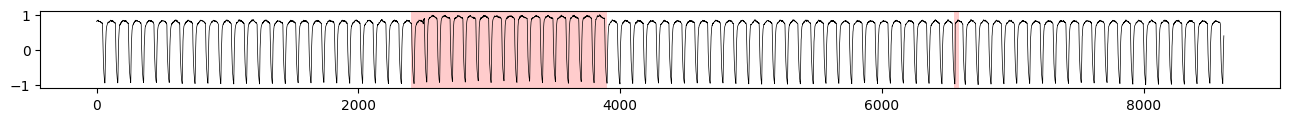

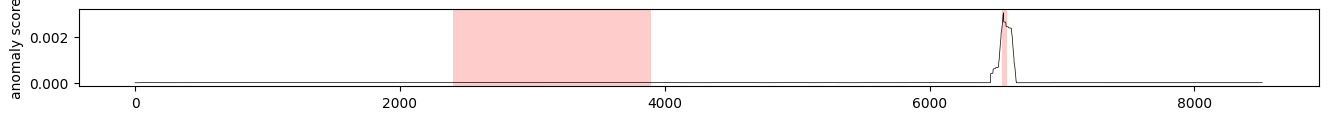

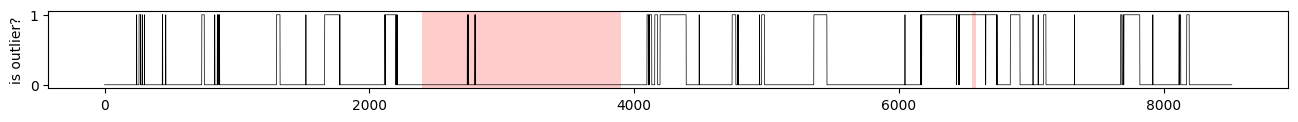

eval w/o point adjustment:
precision: 0.028 recall: 0.027 F1: 0.028 AUC: 0.294
eval with point adjustment:
precision: 0.510 recall: 1.000 F1: 0.675 AUC: 0.294
start detection for channel T-2 ..
anomaly ratio is 20.684 %.
block length is 98 time points.


Compute LOO: 100%|███████████████████████| 8527/8527 [00:00<00:00, 22332.05it/s]


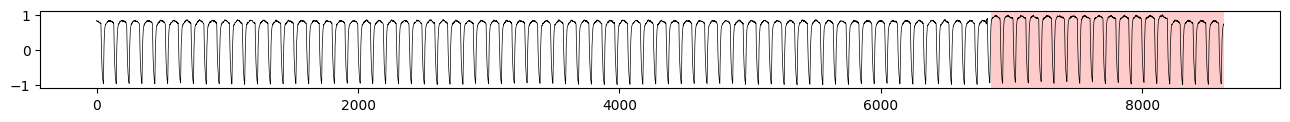

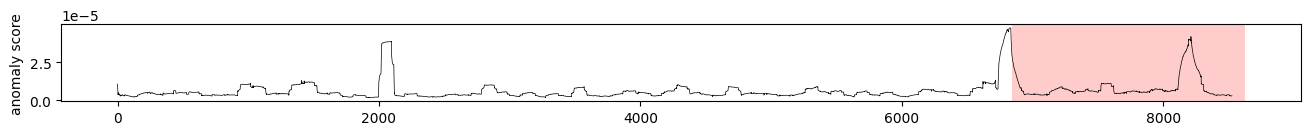

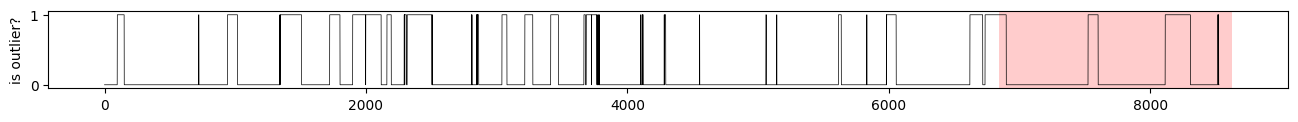

eval w/o point adjustment:
precision: 0.190 recall: 0.199 F1: 0.195 AUC: 0.387
eval with point adjustment:
precision: 0.542 recall: 1.000 F1: 0.703 AUC: 0.387
start detection for channel D-8 ..
anomaly ratio is 0.635 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7844/7844 [00:00<00:00, 75517.54it/s]


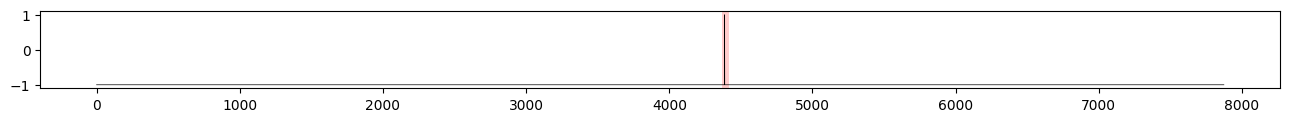

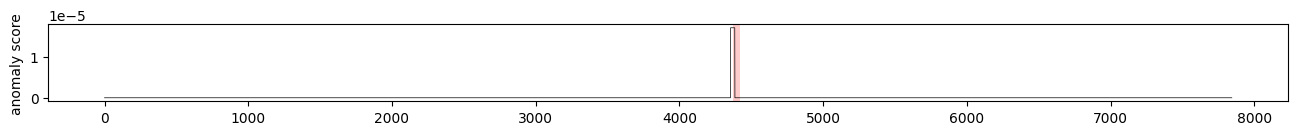

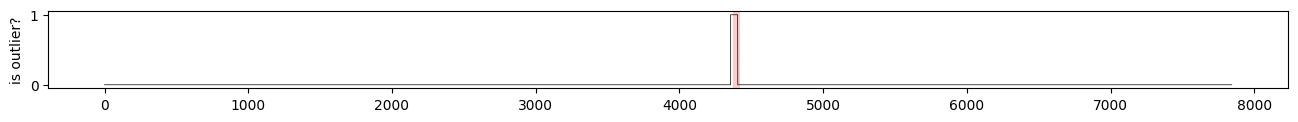

eval w/o point adjustment:
precision: 0.720 recall: 0.720 F1: 0.720 AUC: 0.958
eval with point adjustment:
precision: 0.781 recall: 1.000 F1: 0.877 AUC: 0.958
start detection for channel D-9 ..
anomaly ratio is 15.595 %.
block length is 933 time points.


Compute LOO: 100%|████████████████████████| 6473/6473 [00:03<00:00, 2101.76it/s]


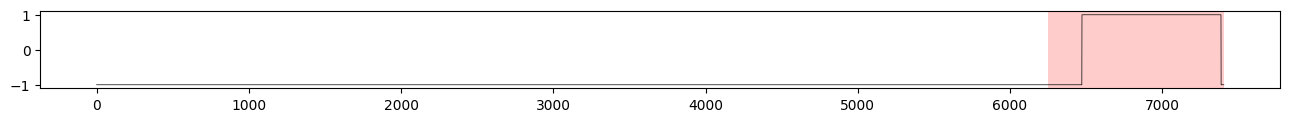

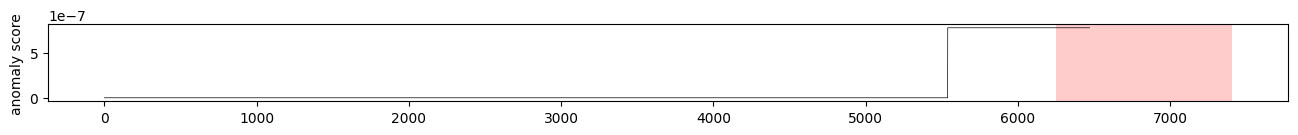

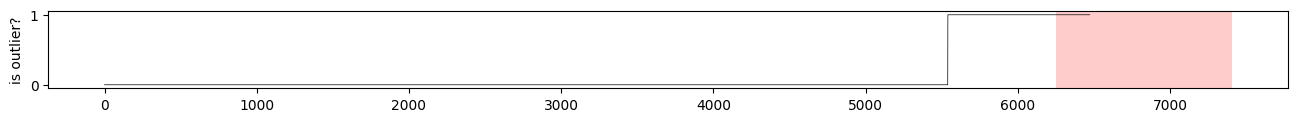

eval w/o point adjustment:
precision: 0.239 recall: 1.000 F1: 0.386 AUC: 0.886
eval with point adjustment:
precision: 0.239 recall: 1.000 F1: 0.386 AUC: 0.886
start detection for channel F-2 ..
anomaly ratio is 34.268 %.
block length is 97 time points.


Compute LOO: 100%|███████████████████████| 8529/8529 [00:00<00:00, 23547.19it/s]


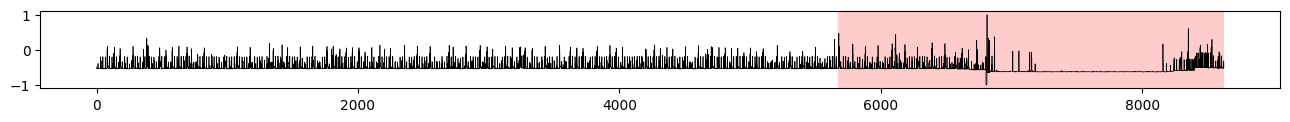

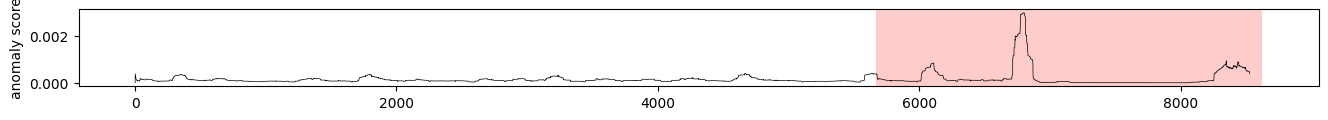

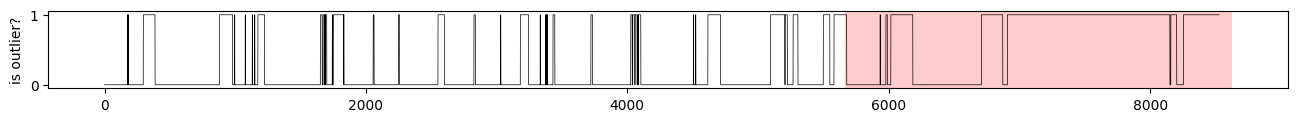

eval w/o point adjustment:
precision: 0.655 recall: 0.669 F1: 0.662 AUC: 0.777
eval with point adjustment:
precision: 0.739 recall: 1.000 F1: 0.850 AUC: 0.777
start detection for channel G-4 ..
anomaly ratio is 0.393 %.
block length is 87 time points.


Compute LOO: 100%|███████████████████████| 7545/7545 [00:00<00:00, 66586.06it/s]


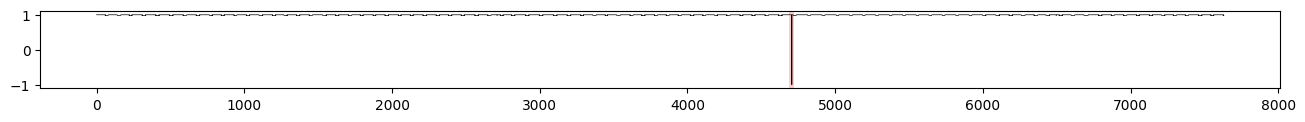

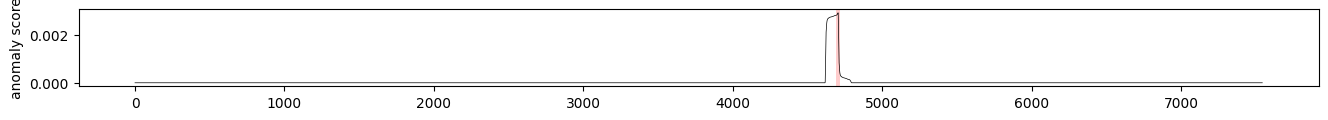

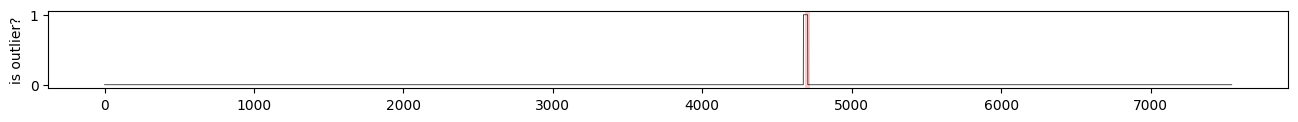

eval w/o point adjustment:
precision: 0.567 recall: 0.567 F1: 0.567 AUC: 0.996
eval with point adjustment:
precision: 0.698 recall: 1.000 F1: 0.822 AUC: 0.996
start detection for channel T-3 ..
anomaly ratio is 2.121 %.
block length is 99 time points.


Compute LOO: 100%|███████████████████████| 8480/8480 [00:00<00:00, 23487.18it/s]


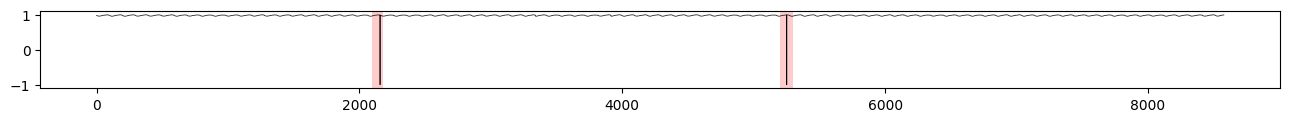

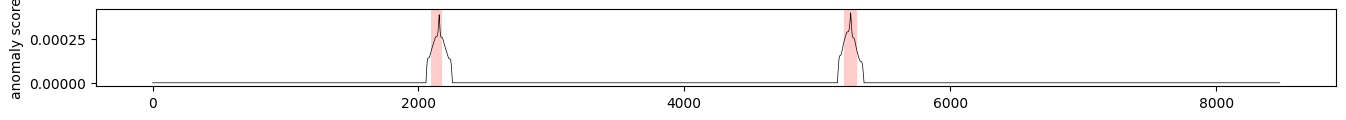

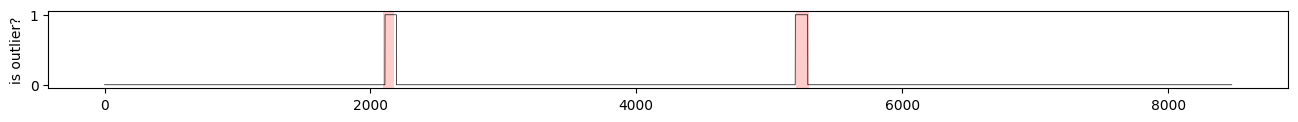

eval w/o point adjustment:
precision: 0.889 recall: 0.879 F1: 0.884 AUC: 0.999
eval with point adjustment:
precision: 0.901 recall: 1.000 F1: 0.948 AUC: 0.999
start detection for channel D-11 ..
anomaly ratio is 0.807 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7401/7401 [00:00<00:00, 81757.36it/s]


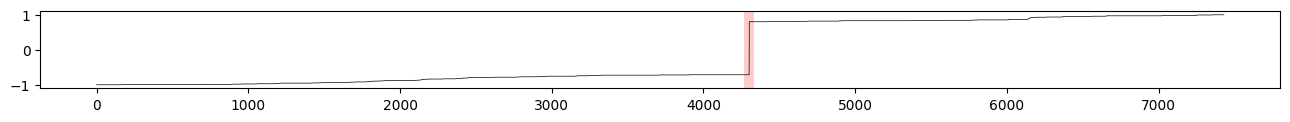

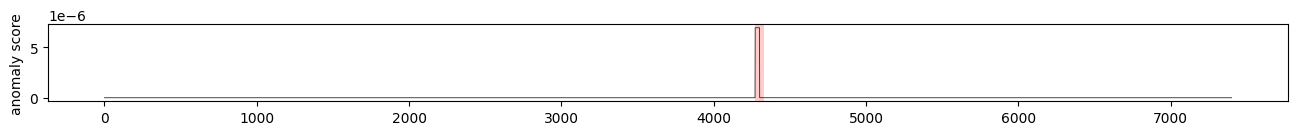

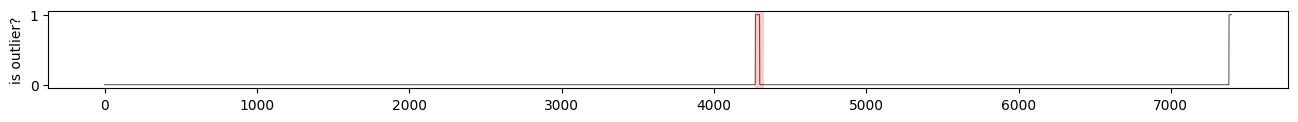

eval w/o point adjustment:
precision: 0.612 recall: 0.500 F1: 0.550 AUC: 0.530
eval with point adjustment:
precision: 0.759 recall: 1.000 F1: 0.863 AUC: 0.530
start detection for channel D-12 ..
anomaly ratio is 34.592 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7888/7888 [00:00<00:00, 81959.09it/s]


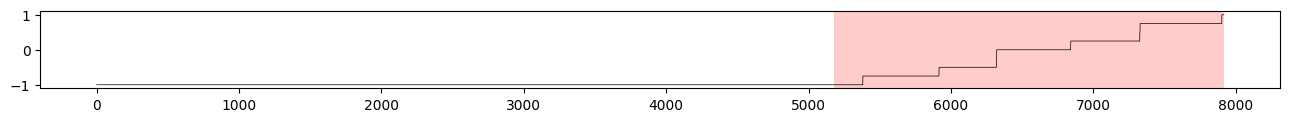

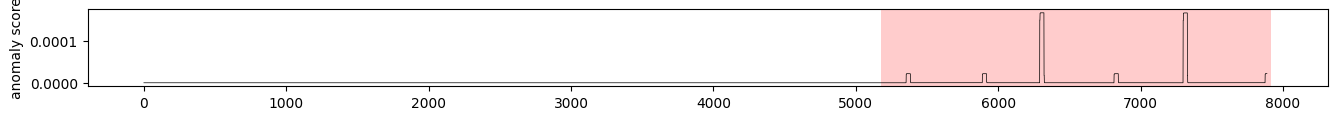

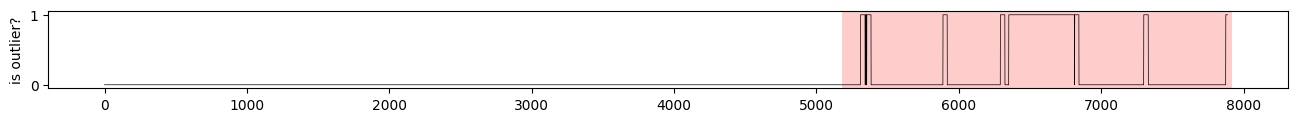

eval w/o point adjustment:
precision: 1.000 recall: 0.247 F1: 0.396 AUC: 0.275
eval with point adjustment:
precision: 1.000 recall: 1.000 F1: 1.000 AUC: 0.275
start detection for channel B-1 ..
anomaly ratio is 0.870 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8014/8014 [00:00<00:00, 81796.36it/s]


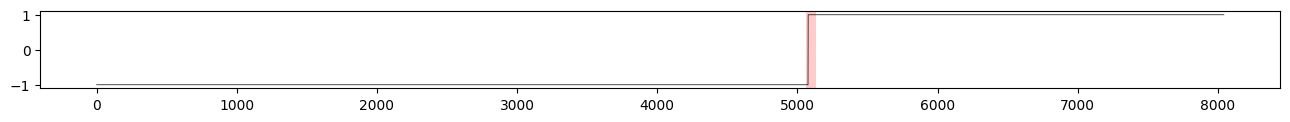

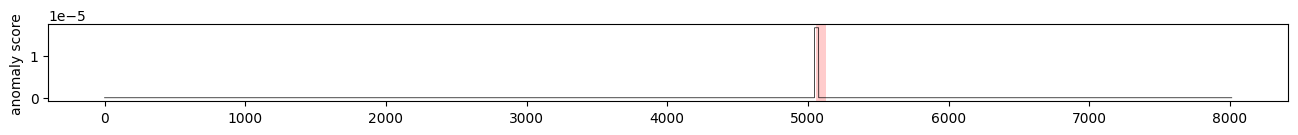

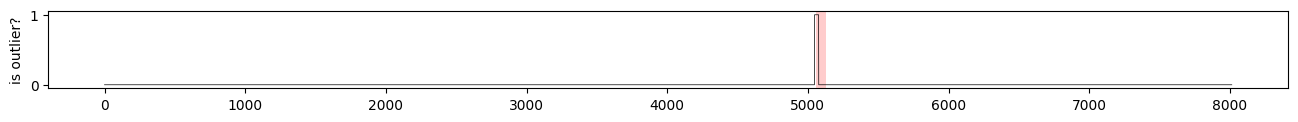

eval w/o point adjustment:
precision: 0.567 recall: 0.243 F1: 0.340 AUC: 0.861
eval with point adjustment:
precision: 0.843 recall: 1.000 F1: 0.915 AUC: 0.861
start detection for channel G-6 ..
anomaly ratio is 1.157 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8610/8610 [00:00<00:00, 80501.11it/s]


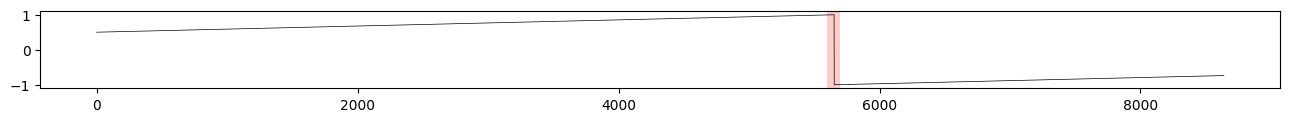

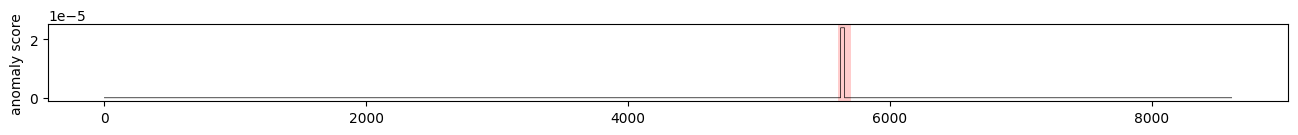

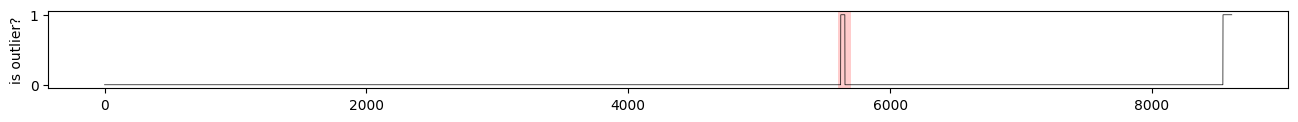

eval w/o point adjustment:
precision: 0.320 recall: 0.320 F1: 0.320 AUC: 0.652
eval with point adjustment:
precision: 0.595 recall: 1.000 F1: 0.746 AUC: 0.652
start detection for channel G-7 ..
anomaly ratio is 3.301 %.
block length is 16 time points.


Compute LOO: 100%|███████████████████████| 8013/8013 [00:00<00:00, 85523.98it/s]


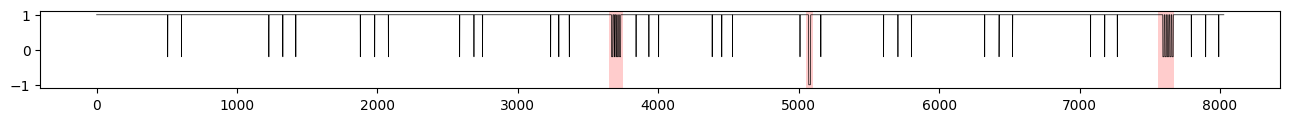

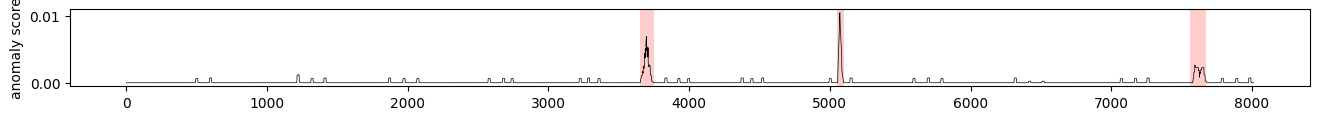

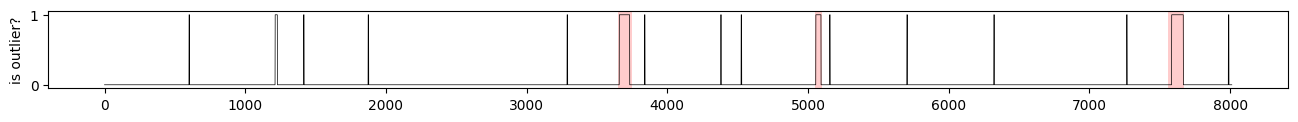

eval w/o point adjustment:
precision: 0.752 recall: 0.732 F1: 0.742 AUC: 0.848
eval with point adjustment:
precision: 0.805 recall: 1.000 F1: 0.892 AUC: 0.848
start detection for channel P-7 ..
anomaly ratio is 20.444 %.
block length is 102 time points.


Compute LOO: 100%|███████████████████████| 7969/7969 [00:00<00:00, 22257.09it/s]


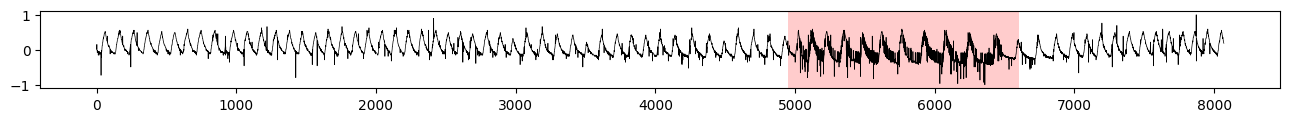

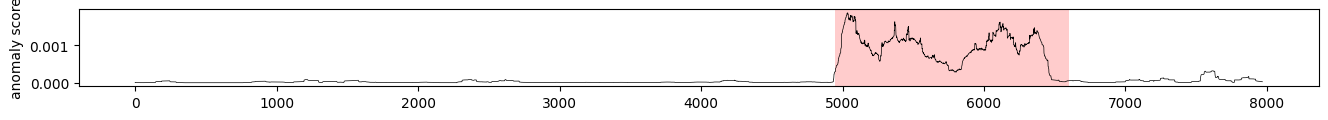

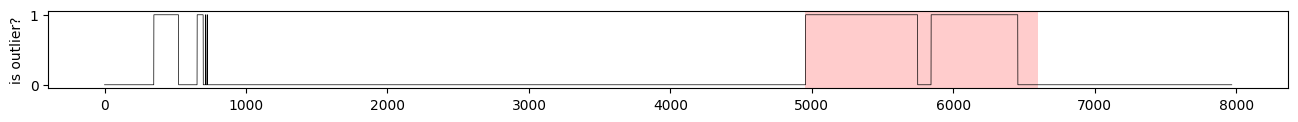

eval w/o point adjustment:
precision: 0.862 recall: 0.852 F1: 0.857 AUC: 0.874
eval with point adjustment:
precision: 0.880 recall: 1.000 F1: 0.936 AUC: 0.874
start detection for channel R-1 ..
anomaly ratio is 1.104 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7214/7214 [00:00<00:00, 80932.40it/s]


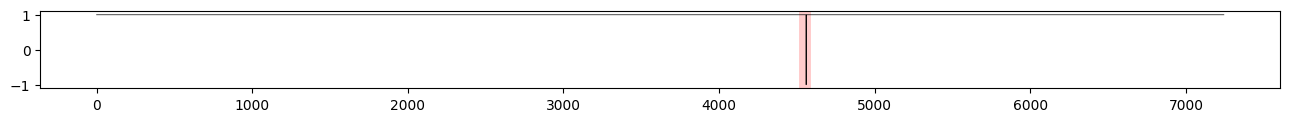

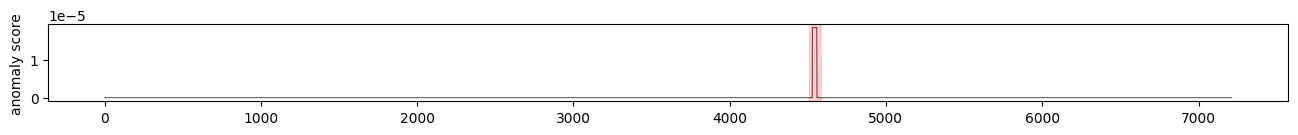

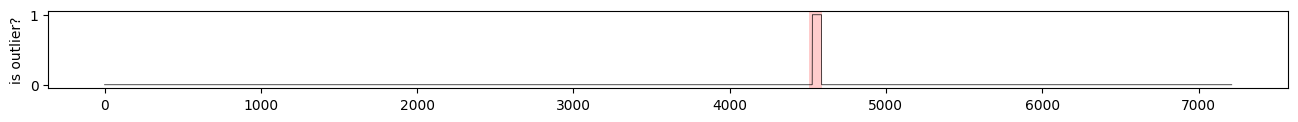

eval w/o point adjustment:
precision: 1.000 recall: 0.750 F1: 0.857 AUC: 0.876
eval with point adjustment:
precision: 1.000 recall: 1.000 F1: 1.000 AUC: 0.876
start detection for channel A-5 ..
anomaly ratio is 1.065 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 4663/4663 [00:00<00:00, 70360.51it/s]


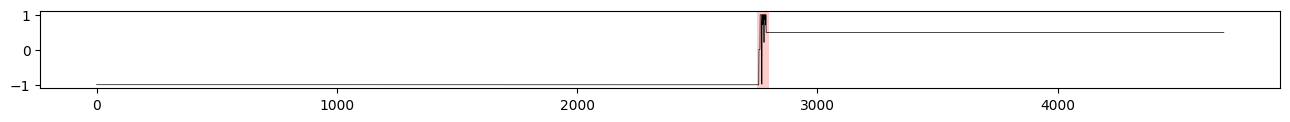

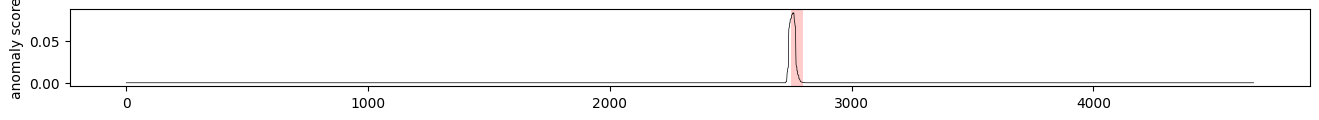

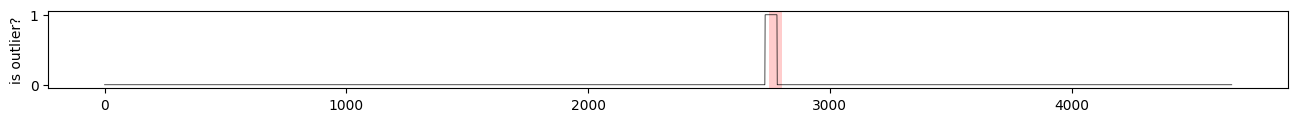

eval w/o point adjustment:
precision: 0.640 recall: 0.640 F1: 0.640 AUC: 0.839
eval with point adjustment:
precision: 0.735 recall: 1.000 F1: 0.847 AUC: 0.839
start detection for channel A-6 ..
anomaly ratio is 0.898 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 4423/4423 [00:00<00:00, 81752.71it/s]


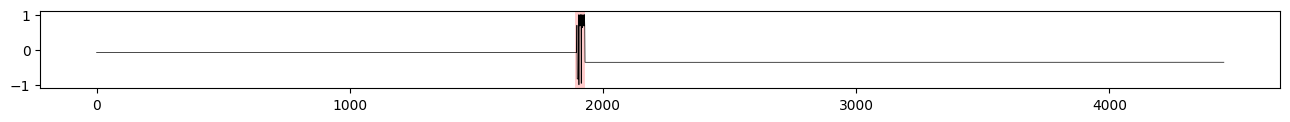

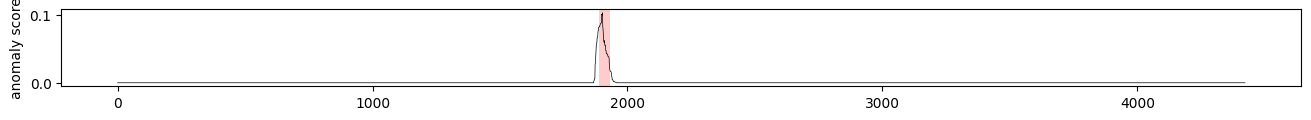

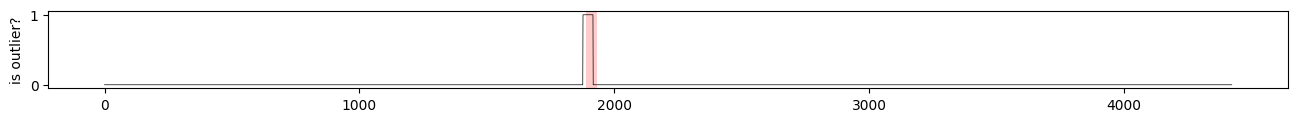

eval w/o point adjustment:
precision: 0.675 recall: 0.675 F1: 0.675 AUC: 0.998
eval with point adjustment:
precision: 0.755 recall: 1.000 F1: 0.860 AUC: 0.998
start detection for channel A-7 ..
anomaly ratio is 27.807 %.
block length is 14 time points.


Compute LOO: 100%|███████████████████████| 8617/8617 [00:00<00:00, 83114.83it/s]


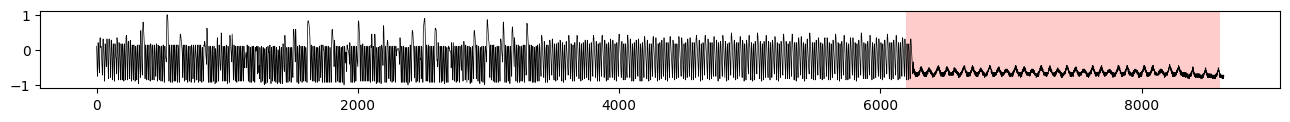

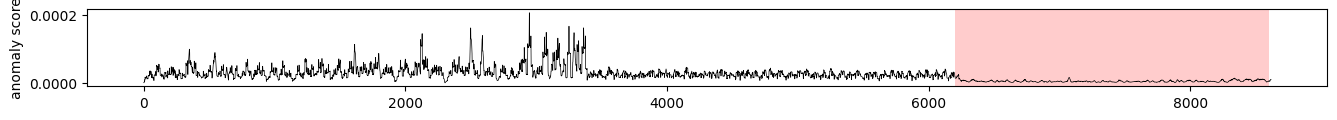

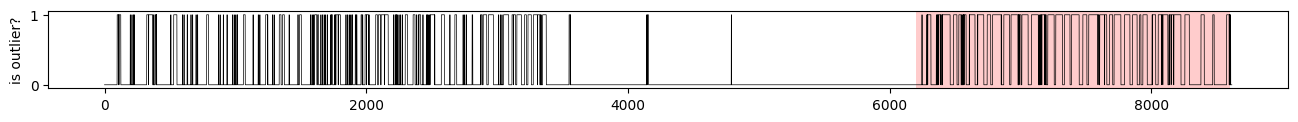

eval w/o point adjustment:
precision: 0.609 recall: 0.608 F1: 0.608 AUC: 0.840
eval with point adjustment:
precision: 0.719 recall: 1.000 F1: 0.837 AUC: 0.840
start detection for channel D-13 ..
anomaly ratio is 2.088 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 7633/7633 [00:00<00:00, 82510.22it/s]


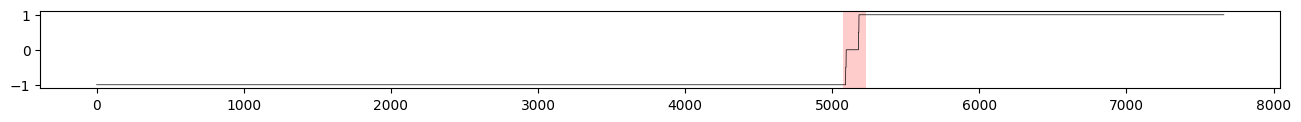

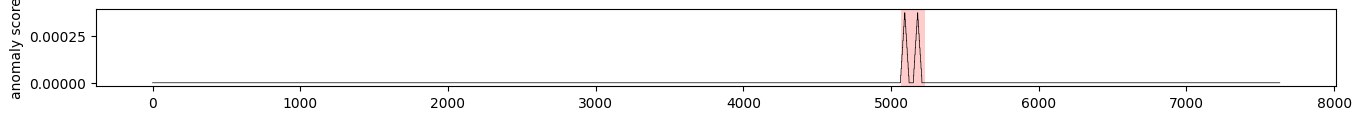

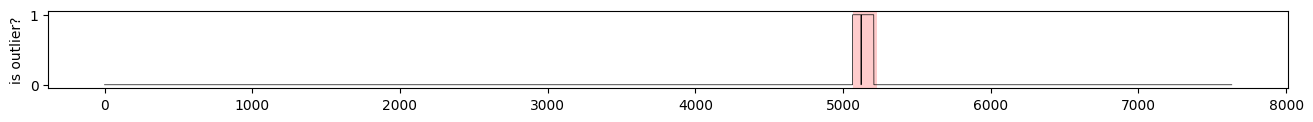

eval w/o point adjustment:
precision: 0.965 recall: 0.856 F1: 0.907 AUC: 0.964
eval with point adjustment:
precision: 0.970 recall: 1.000 F1: 0.985 AUC: 0.964
start detection for channel A-8 ..
anomaly ratio is 45.433 %.
block length is 765 time points.


Compute LOO: 100%|████████████████████████| 7610/7610 [00:02<00:00, 2914.35it/s]


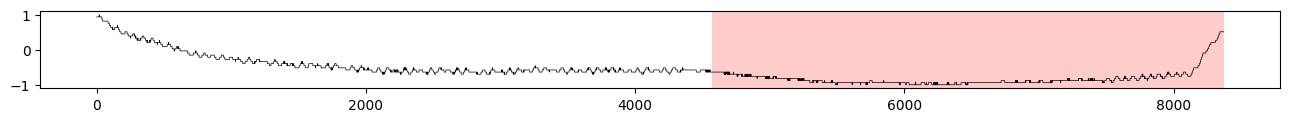

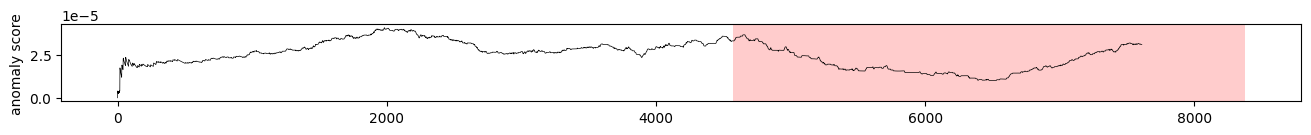

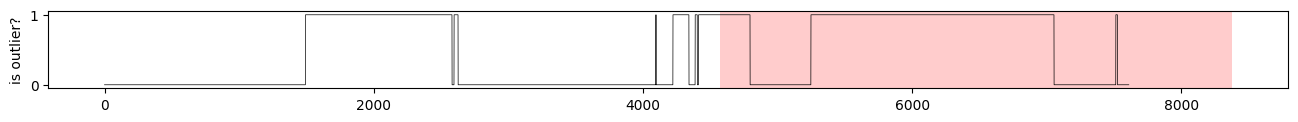

eval w/o point adjustment:
precision: 0.592 recall: 0.672 F1: 0.629 AUC: 0.741
eval with point adjustment:
precision: 0.683 recall: 1.000 F1: 0.812 AUC: 0.741
start detection for channel A-9 ..
anomaly ratio is 45.815 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8404/8404 [00:00<00:00, 79301.07it/s]


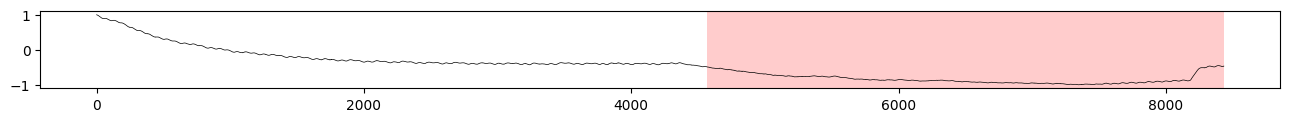

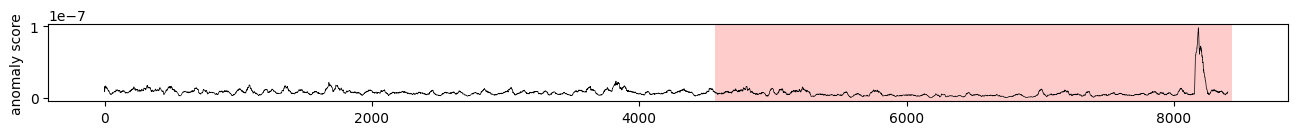

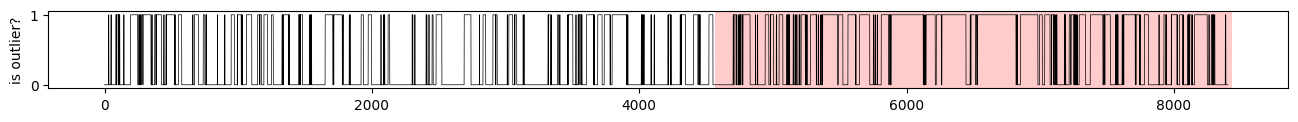

eval w/o point adjustment:
precision: 0.614 recall: 0.616 F1: 0.615 AUC: 0.672
eval with point adjustment:
precision: 0.721 recall: 1.000 F1: 0.838 AUC: 0.672
start detection for channel F-3 ..
anomaly ratio is 0.478 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 8346/8346 [00:00<00:00, 82045.61it/s]


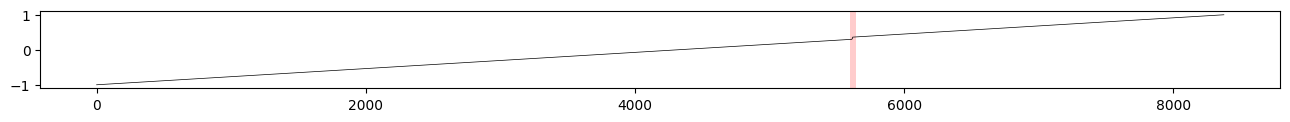

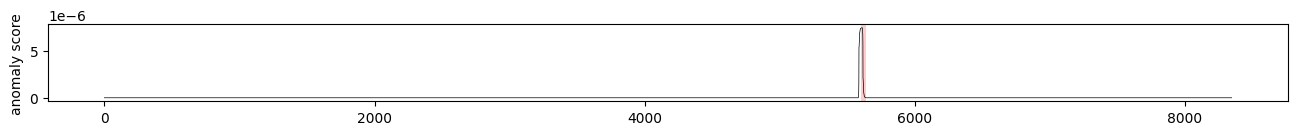

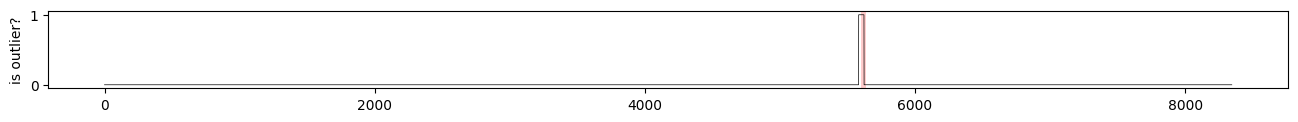

eval w/o point adjustment:
precision: 0.575 recall: 0.575 F1: 0.575 AUC: 0.750
eval with point adjustment:
precision: 0.702 recall: 1.000 F1: 0.825 AUC: 0.750


In [52]:

len_test_dict, len_anomaly_dict, len_ratio_dict = {}, {}, {}
prec_dict, rec_dict, f1_dict, auc_dict, best_f1_dict = {}, {}, {}, {}, {}
prec_adj_dict, rec_adj_dict, f1_adj_dict = {}, {}, {}

for channel in smap_df.chan_id:
    
    print(f"start detection for channel {channel} ..")

    # only use first time series 
    ts_test = np.load(data_path/"test"/f"{channel}.npy").T[0]
    seq_len = len(ts_test)
    anomaly_seqs = smap_df.loc[smap_df.chan_id == channel].anomaly_sequences.to_numpy().item()
    anomaly_seqs = re.findall(r'\d+', anomaly_seqs)
    anomaly_intervals = []
    for i in list(range(0, len(anomaly_seqs), 2)):
        anomaly_intervals.append(anomaly_seqs[i:i+2])
    anomaly_intervals = np.array(anomaly_intervals).astype(int)
    
    ground_truth = np.zeros_like(ts_test)
    
    plt.figure(figsize=(16,1))
    plt.plot(ts_test, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    
    anomaly_len = sum(ground_truth)
    anomaly_ratio = anomaly_len / seq_len
    print(f"anomaly ratio is {anomaly_ratio * 100.:.3f} %.")

    len_test_dict.update({channel: seq_len})
    len_anomaly_dict.update({channel: anomaly_len})
    len_ratio_dict.update({channel: anomaly_ratio})

    block_length = pyd.estimate_periodicity(ts_test)
    if block_length < 10 or block_length > 1000:
        block_length = 30
    print(f"block length is {block_length} time points.")
    X_train, Y_train = split_time_series(ts_test, block_length=block_length)
    matched_block_idxs = match_train_time_block_index(ts_test, X_train)
    
    lr = LinearRegression().fit(X_train, Y_train)
    beta = lr.coef_
    b = lr.intercept_
    inv_hess = len(X_train) * np.linalg.inv(X_train.T @ X_train)
    params = (beta, b, inv_hess)
    
    # compute IF for each time block
    time_block_loos = []
    for i in tqdm(range(len(X_train)), total=len(X_train), desc="Compute LOO"):
      time_block_loos.append(compute_loo_linear_approx(i, i, X_train, Y_train, X_train, Y_train, params))
    time_block_loos = np.array(time_block_loos)
    
    # compute IF for each time point
    time_point_loos = []
    for i in range(len(matched_block_idxs)):
      time_point_loos.append((time_block_loos[matched_block_idxs[i]]).mean())
    time_point_loos = np.array(time_point_loos)
    
    anomaly_scores = scale_influence_functions(time_point_loos, block_length)
    
    plt.figure(figsize=(16,1))
    loos_viz = np.ones_like(ts_test) * np.nan
    loos_viz[:len(X_train)] = time_point_loos
    plt.plot(loos_viz, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    plt.ylabel("anomaly score")
    plt.show()
    
    detected_outliers = np.zeros_like(ts_test)
    detected_outliers = anomaly_scores > np.quantile(anomaly_scores, 1-anomaly_ratio)
    
    plt.figure(figsize=(16,1))
    loos_viz = np.ones_like(ts_test) * np.nan
    loos_viz[:len(detected_outliers)] = detected_outliers
    plt.plot(loos_viz, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    plt.ylabel("is outlier?")
    plt.show()
    
    print("eval w/o point adjustment:")
    prec, rec, f1, auc = eval_anomaly_detector(ground_truth[:len(detected_outliers)], detected_outliers, anomaly_scores)
    print("eval with point adjustment:")
    prec_adj, rec_adj, f1_adj, _ = eval_anomaly_detector(ground_truth[:len(detected_outliers)], detected_outliers, anomaly_scores, adjust_detection=True)

    _, _, best_f1 = eval_anomaly_detector_all_thresholds(ground_truth[:len(detected_outliers)], anomaly_scores, adjust_detection=False, verbose=False)
    
    prec_dict.update({channel: prec})
    rec_dict.update({channel: rec})
    f1_dict.update({channel: f1})
    auc_dict.update({channel: auc})
    best_f1_dict.update({channel: best_f1})

    prec_adj_dict.update({channel: prec_adj})
    rec_adj_dict.update({channel: rec_adj})
    f1_adj_dict.update({channel: f1_adj})

In [53]:
print(f"[block length = period] avg. AUC: {np.mean(list(auc_dict.values())):.3f}")
print(f"[block length = period] avg. F1 (unadjusted): {np.mean(list(f1_dict.values())):.3f}")
print(f"[block length = period] avg. F1 (point adjustment): {np.mean(list(f1_adj_dict.values())):.3f}")
print(f"[block length = period] avg. best F1: {np.mean(list(best_f1_dict.values())):.3f}")

[block length = period] avg. AUC: 0.719
[block length = period] avg. F1 (unadjusted): 0.475
[block length = period] avg. F1 (point adjustment): 0.783
[block length = period] avg. best F1: 0.480


In [56]:
smap_metrics = pd.DataFrame({
    "Num_of_Test": len_test_dict,
    "Len_of_Anomaly": len_anomaly_dict,
    "Anomaly_Ratio": len_ratio_dict,
    "Precision(w.o. Adjustment)": prec_dict,
    "Recall(w.o. Adjustment)": rec_dict,
    "F1(w.o. Adjustment)": f1_dict,
    "Precision(w. Adjustment)": prec_adj_dict,
    "Recall(w. Adjustment)": rec_adj_dict,
    "F1(w. Adjustment)": f1_adj_dict,
    "Best_F1_Score": best_f1_dict,
    "AUC": auc_dict,
})
smap_metrics.insert(0, "Dataset", smap_metrics.index)
smap_metrics.reset_index(drop = True, inplace = True)

In [67]:
smap_metrics.to_csv("./SMAP_Influence_Function_results.csv") 

### MSL

start detection for channel M-6 ..
anomaly ratio is 8.785 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2019/2019 [00:00<00:00, 66611.34it/s]


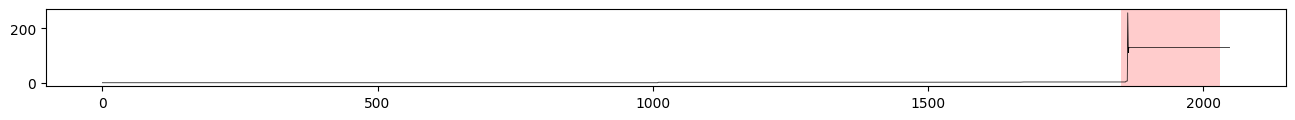

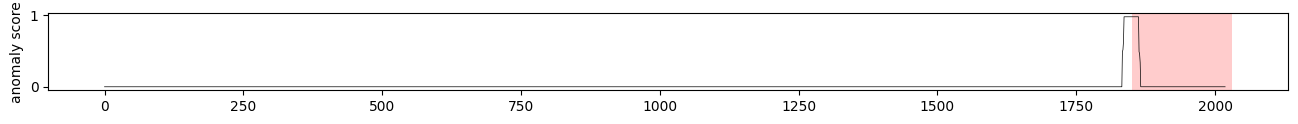

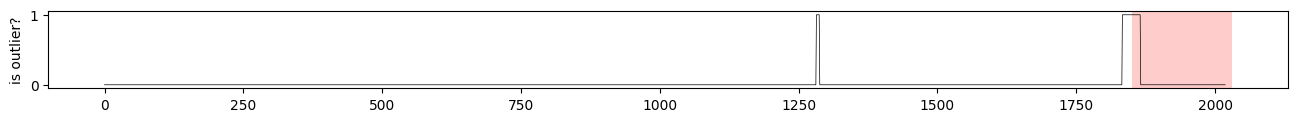

eval w/o point adjustment:
precision: 0.410 recall: 0.095 F1: 0.154 AUC: 0.114
eval with point adjustment:
precision: 0.880 recall: 1.000 F1: 0.936 AUC: 0.114
start detection for channel M-1 ..
anomaly ratio is 50.066 %.
block length is 45 time points.


Compute LOO: 100%|███████████████████████| 2232/2232 [00:00<00:00, 72009.10it/s]


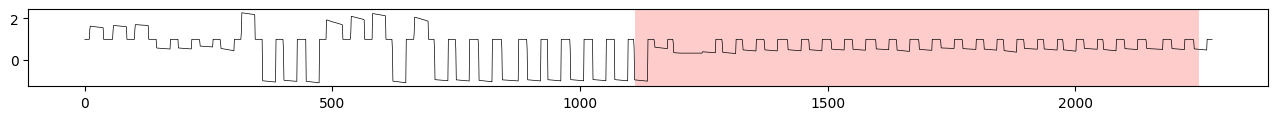

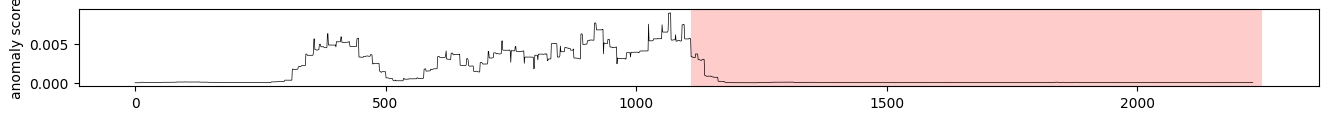

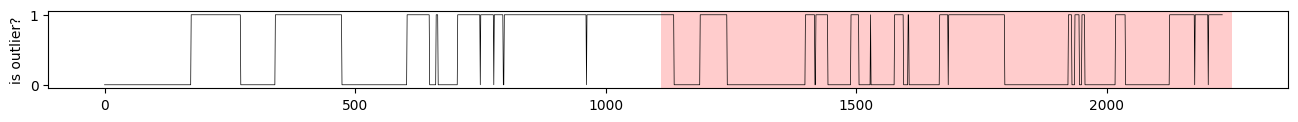

eval w/o point adjustment:
precision: 0.390 recall: 0.389 F1: 0.389 AUC: 0.388
eval with point adjustment:
precision: 0.622 recall: 1.000 F1: 0.767 AUC: 0.388
start detection for channel M-2 ..
anomaly ratio is 50.066 %.
block length is 43 time points.


Compute LOO: 100%|███████████████████████| 2234/2234 [00:00<00:00, 76941.38it/s]


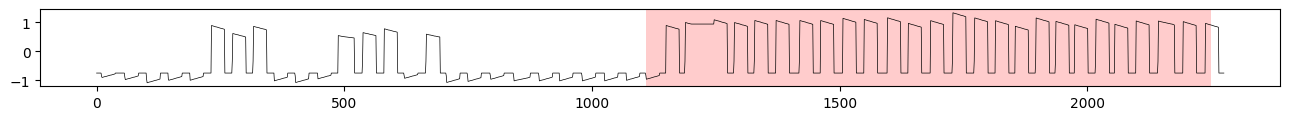

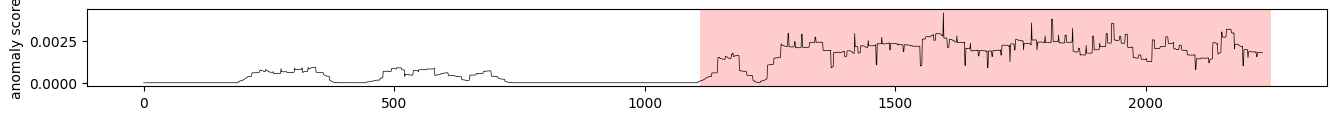

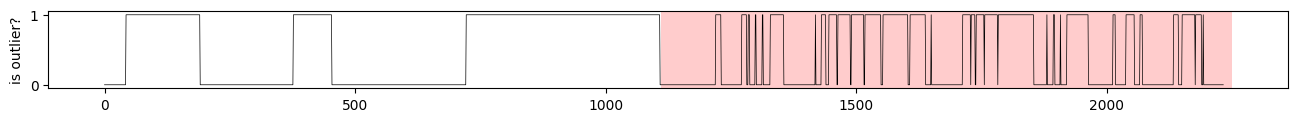

eval w/o point adjustment:
precision: 0.453 recall: 0.450 F1: 0.451 AUC: 0.566
eval with point adjustment:
precision: 0.647 recall: 1.000 F1: 0.786 AUC: 0.566
start detection for channel S-2 ..
anomaly ratio is 0.547 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 1797/1797 [00:00<00:00, 77417.00it/s]


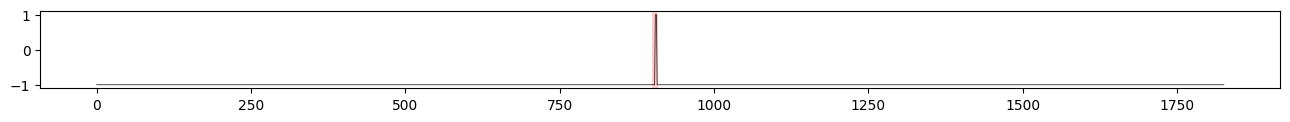

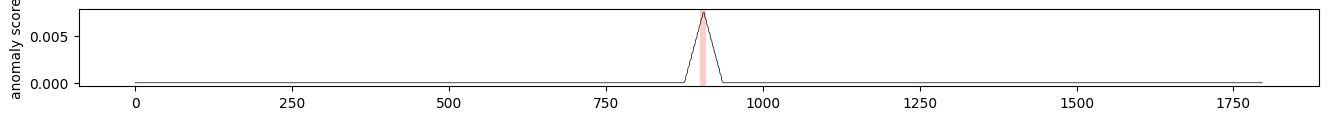

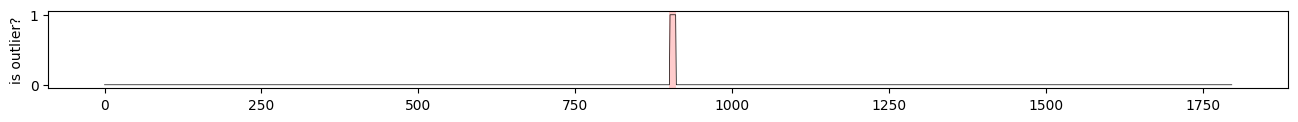

eval w/o point adjustment:
precision: 0.900 recall: 0.900 F1: 0.900 AUC: 1.000
eval with point adjustment:
precision: 0.909 recall: 1.000 F1: 0.952 AUC: 1.000
start detection for channel P-10 ..
anomaly ratio is 2.131 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 6070/6070 [00:00<00:00, 80631.34it/s]


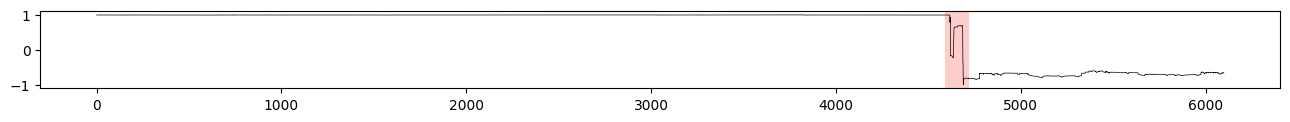

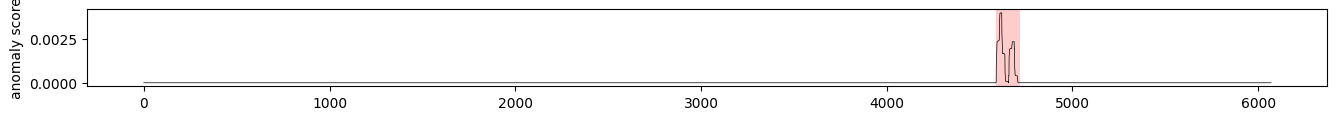

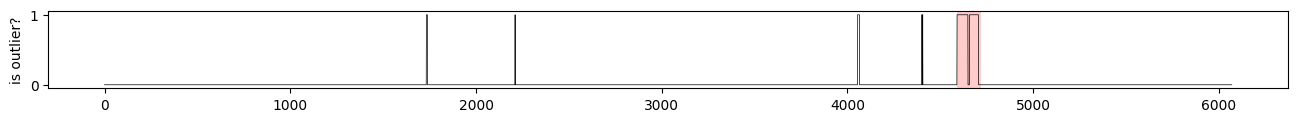

eval w/o point adjustment:
precision: 0.831 recall: 0.831 F1: 0.831 AUC: 0.833
eval with point adjustment:
precision: 0.855 recall: 1.000 F1: 0.922 AUC: 0.833
start detection for channel T-4 ..
anomaly ratio is 3.067 %.
block length is 70 time points.


Compute LOO: 100%|███████████████████████| 2147/2147 [00:00<00:00, 71576.41it/s]


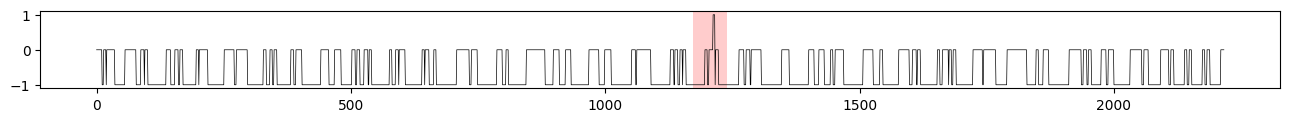

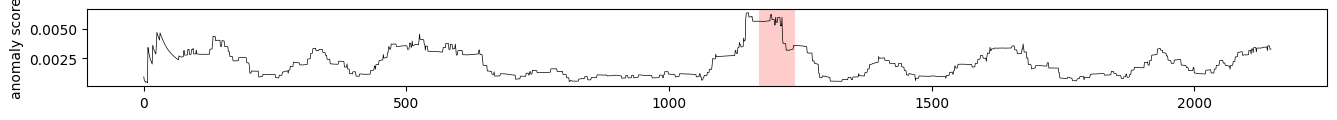

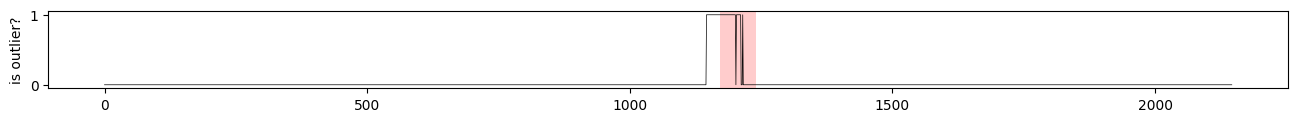

eval w/o point adjustment:
precision: 0.606 recall: 0.588 F1: 0.597 AUC: 0.931
eval with point adjustment:
precision: 0.723 recall: 1.000 F1: 0.840 AUC: 0.931
start detection for channel T-5 ..
anomaly ratio is 1.127 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2188/2188 [00:00<00:00, 77475.58it/s]


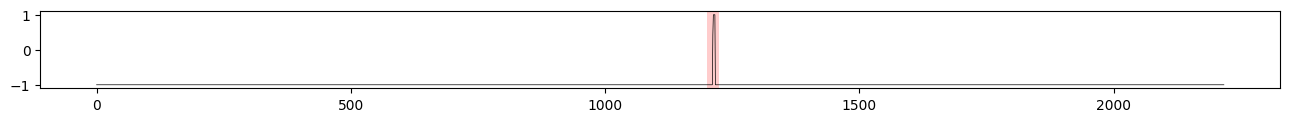

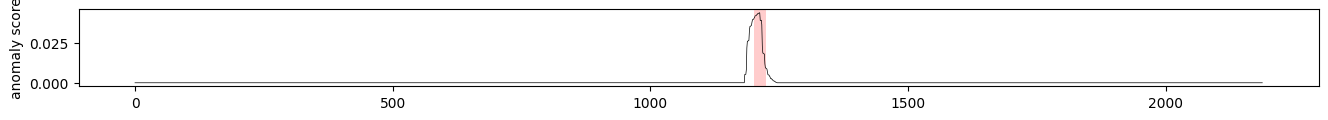

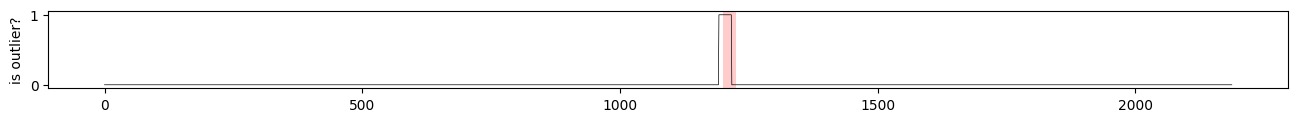

eval w/o point adjustment:
precision: 0.680 recall: 0.680 F1: 0.680 AUC: 0.998
eval with point adjustment:
precision: 0.758 recall: 1.000 F1: 0.862 AUC: 0.998
start detection for channel F-7 ..
anomaly ratio is 8.310 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 5024/5024 [00:00<00:00, 81037.51it/s]


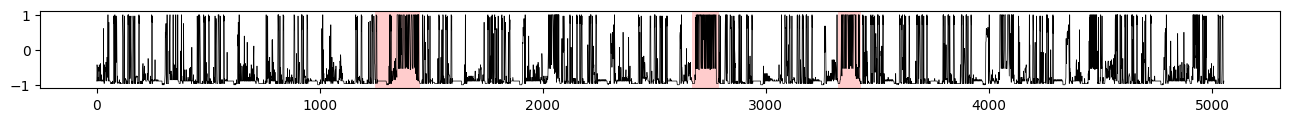

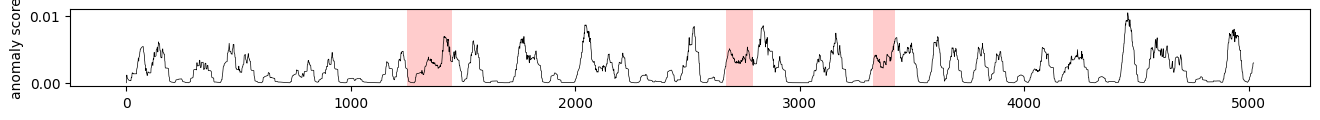

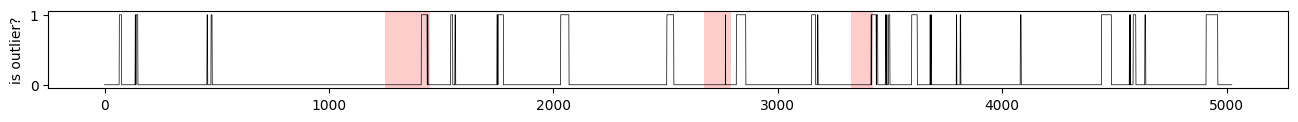

eval w/o point adjustment:
precision: 0.089 recall: 0.088 F1: 0.088 AUC: 0.450
eval with point adjustment:
precision: 0.524 recall: 1.000 F1: 0.688 AUC: 0.450
start detection for channel M-3 ..
anomaly ratio is 11.754 %.
block length is 276 time points.


Compute LOO: 100%|███████████████████████| 1851/1851 [00:00<00:00, 12015.51it/s]


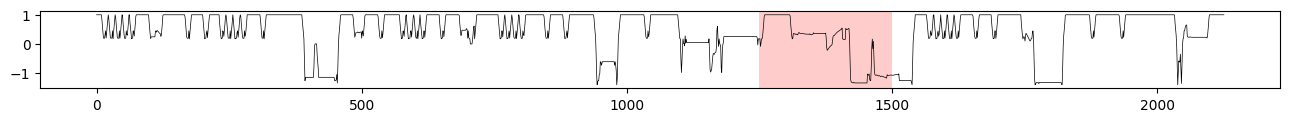

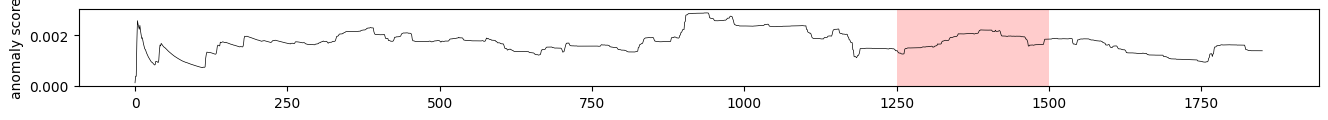

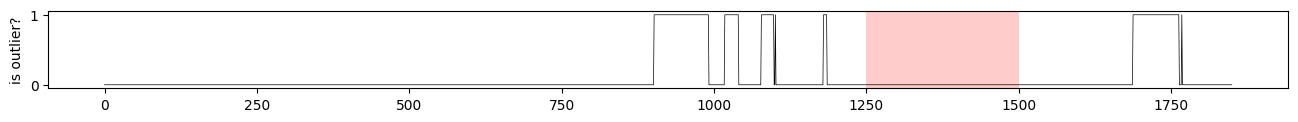

eval w/o point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.525
eval with point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.525
start detection for channel M-4 ..
anomaly ratio is 12.267 %.
block length is 44 time points.


Compute LOO: 100%|███████████████████████| 1994/1994 [00:00<00:00, 75036.04it/s]


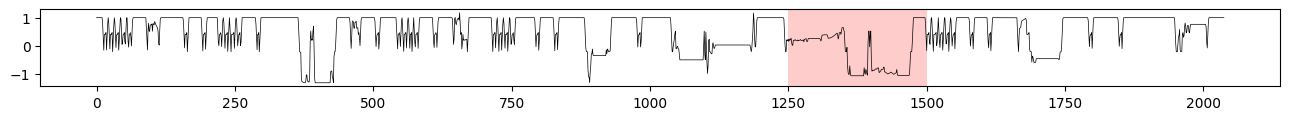

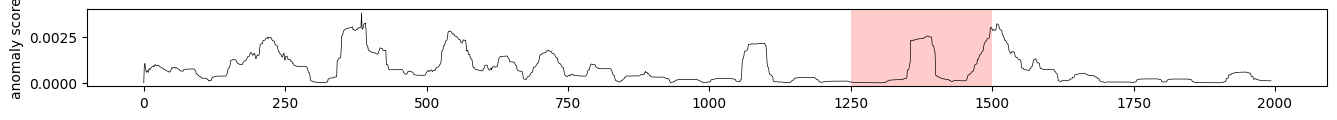

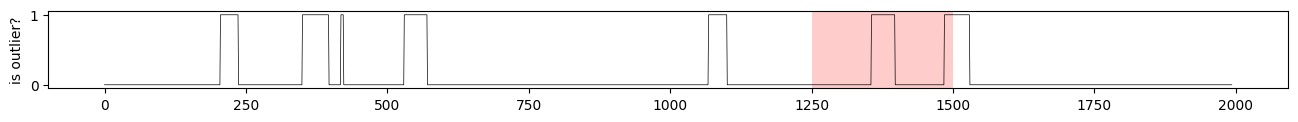

eval w/o point adjustment:
precision: 0.233 recall: 0.228 F1: 0.230 AUC: 0.689
eval with point adjustment:
precision: 0.571 recall: 1.000 F1: 0.727 AUC: 0.689
start detection for channel M-5 ..
anomaly ratio is 13.026 %.
block length is 15 time points.


Compute LOO: 100%|███████████████████████| 2288/2288 [00:00<00:00, 76646.84it/s]


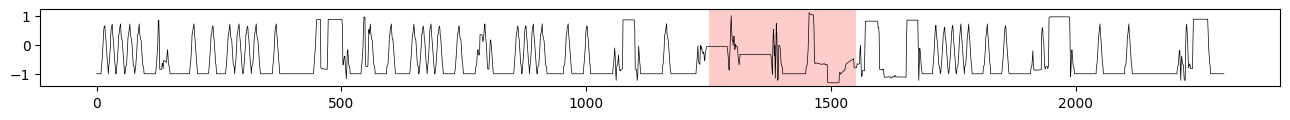

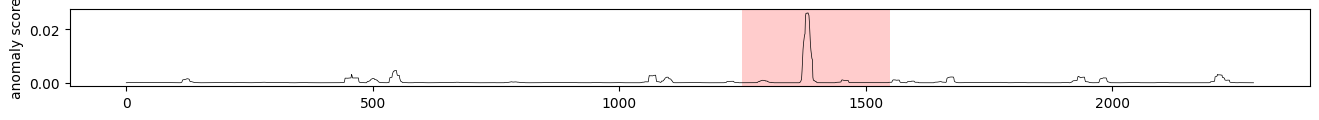

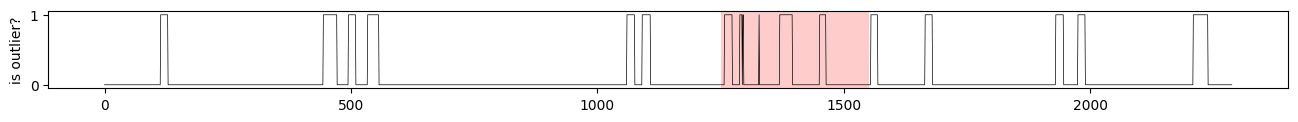

eval w/o point adjustment:
precision: 0.236 recall: 0.210 F1: 0.222 AUC: 0.660
eval with point adjustment:
precision: 0.595 recall: 1.000 F1: 0.746 AUC: 0.660
start detection for channel P-15 ..
anomaly ratio is 0.700 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2826/2826 [00:00<00:00, 79618.89it/s]


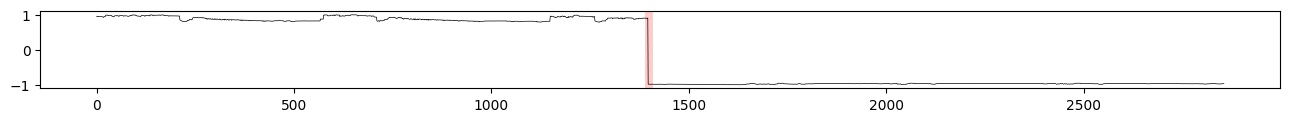

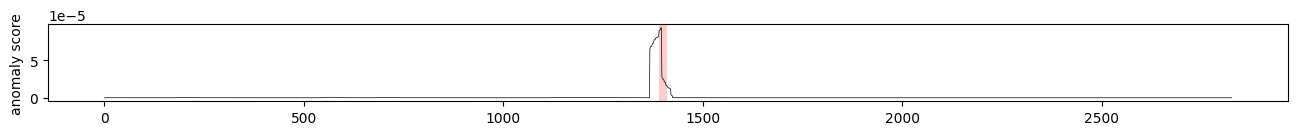

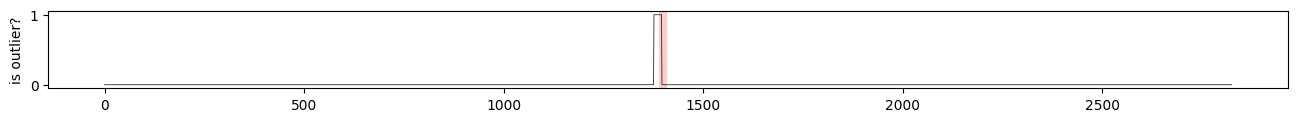

eval w/o point adjustment:
precision: 0.350 recall: 0.350 F1: 0.350 AUC: 0.995
eval with point adjustment:
precision: 0.606 recall: 1.000 F1: 0.755 AUC: 0.995
start detection for channel C-1 ..
anomaly ratio is 13.693 %.
block length is 264 time points.


Compute LOO: 100%|███████████████████████| 2000/2000 [00:00<00:00, 11054.05it/s]


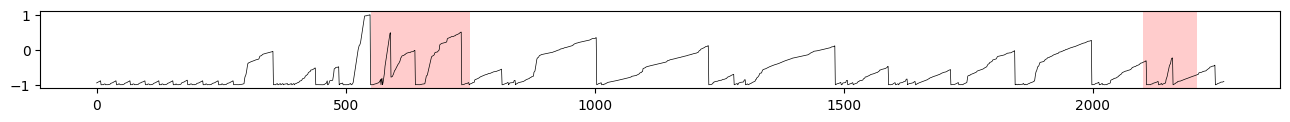

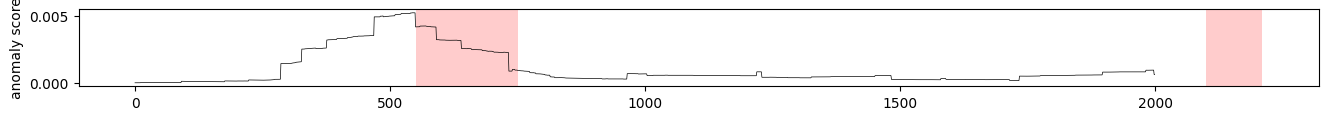

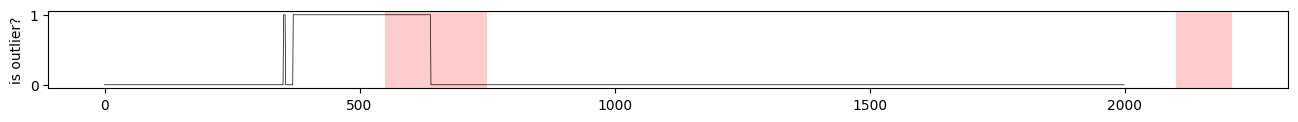

eval w/o point adjustment:
precision: 0.328 recall: 0.450 F1: 0.380 AUC: 0.839
eval with point adjustment:
precision: 0.521 recall: 1.000 F1: 0.685 AUC: 0.839
start detection for channel C-2 ..
anomaly ratio is 6.582 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2021/2021 [00:00<00:00, 77087.43it/s]


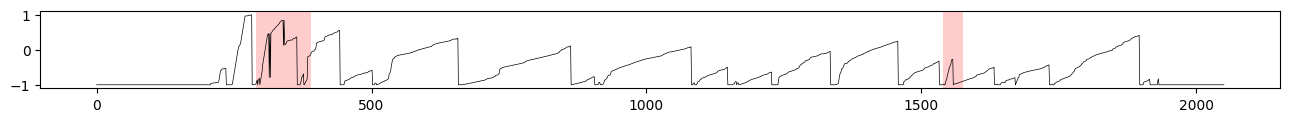

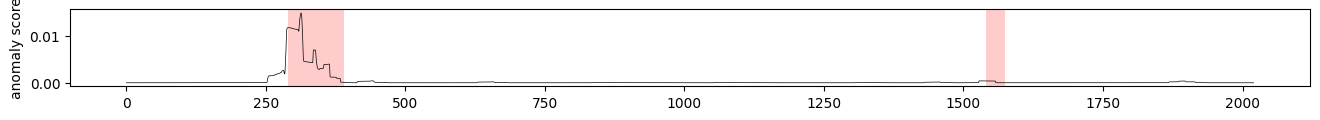

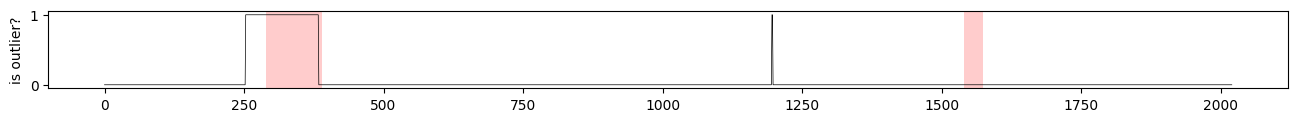

eval w/o point adjustment:
precision: 0.707 recall: 0.696 F1: 0.701 AUC: 0.745
eval with point adjustment:
precision: 0.719 recall: 0.741 F1: 0.730 AUC: 0.745
start detection for channel T-12 ..
anomaly ratio is 4.938 %.
block length is 460 time points.


Compute LOO: 100%|████████████████████████| 1970/1970 [00:00<00:00, 6040.18it/s]


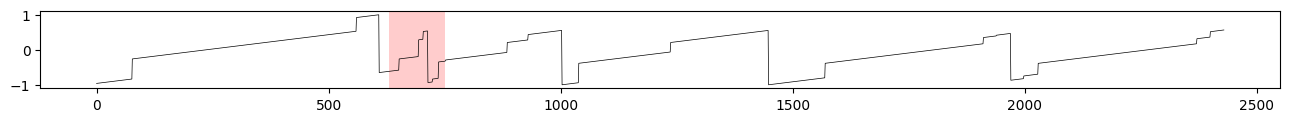

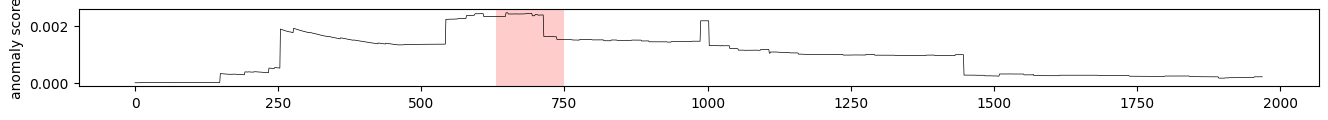

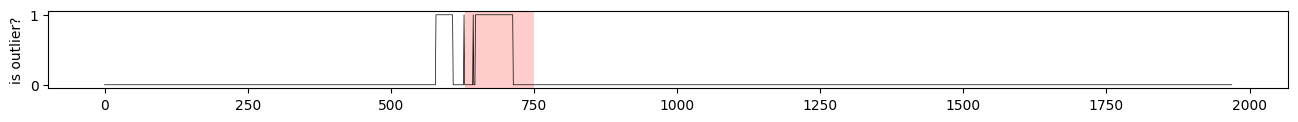

eval w/o point adjustment:
precision: 0.684 recall: 0.558 F1: 0.615 AUC: 0.891
eval with point adjustment:
precision: 0.795 recall: 1.000 F1: 0.886 AUC: 0.891
start detection for channel T-13 ..
anomaly ratio is 10.288 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2400/2400 [00:00<00:00, 80168.28it/s]


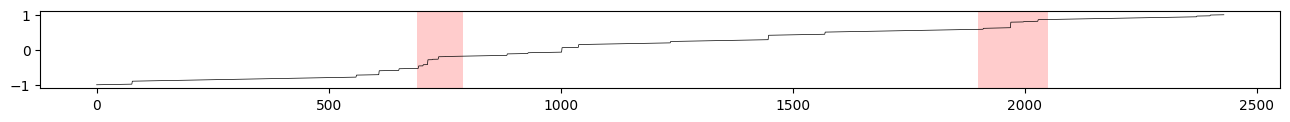

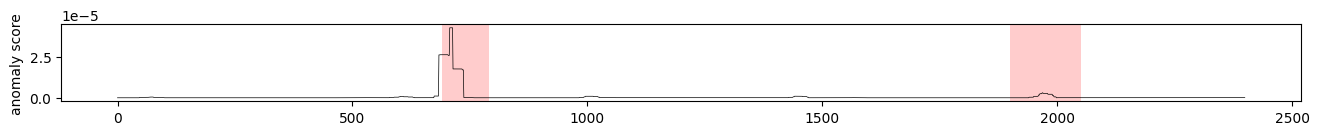

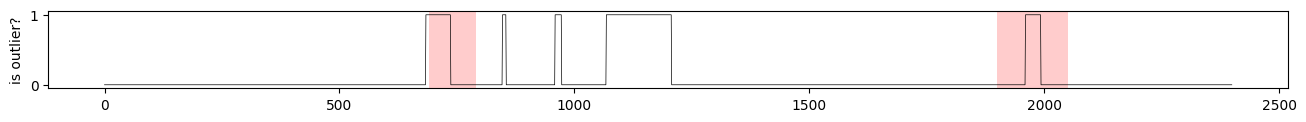

eval w/o point adjustment:
precision: 0.324 recall: 0.320 F1: 0.322 AUC: 0.512
eval with point adjustment:
precision: 0.600 recall: 1.000 F1: 0.750 AUC: 0.512
start detection for channel F-4 ..
anomaly ratio is 2.046 %.
block length is 705 time points.


Compute LOO: 100%|████████████████████████| 2717/2717 [00:00<00:00, 3282.56it/s]


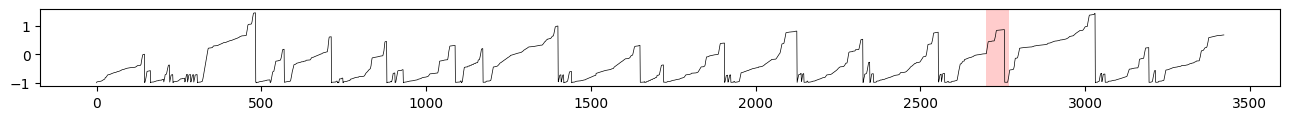

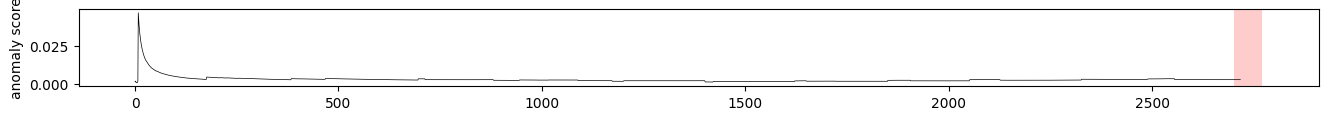

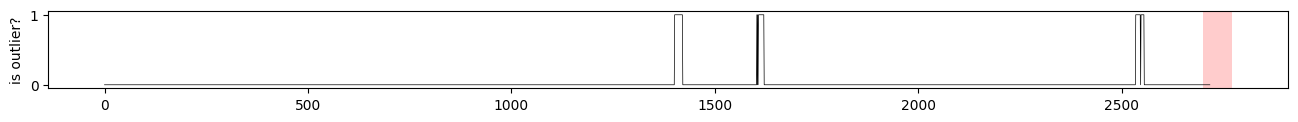

eval w/o point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.273
eval with point adjustment:
precision: 0.000 recall: 0.000 F1: 0.000 AUC: 0.273
start detection for channel F-5 ..
anomaly ratio is 3.825 %.
block length is 260 time points.


Compute LOO: 100%|███████████████████████| 3662/3662 [00:00<00:00, 12957.93it/s]


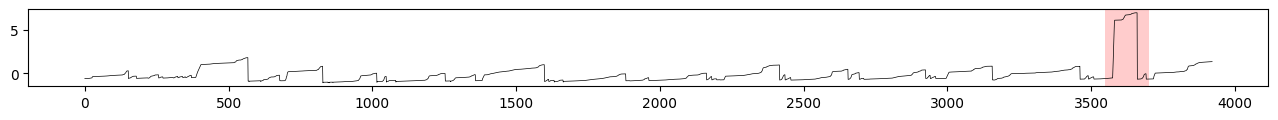

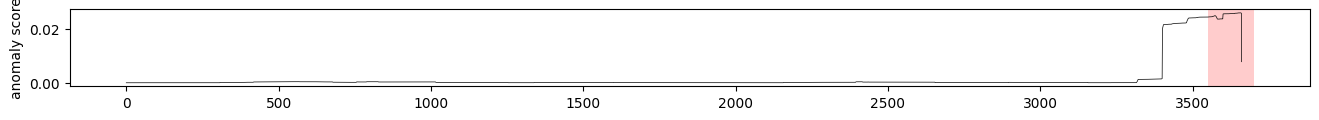

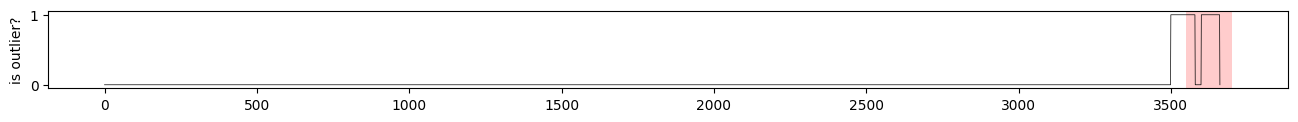

eval w/o point adjustment:
precision: 0.645 recall: 0.812 F1: 0.719 AUC: 0.996
eval with point adjustment:
precision: 0.691 recall: 1.000 F1: 0.818 AUC: 0.996
start detection for channel D-14 ..
anomaly ratio is 8.381 %.
block length is 181 time points.


Compute LOO: 100%|███████████████████████| 2444/2444 [00:00<00:00, 17291.55it/s]


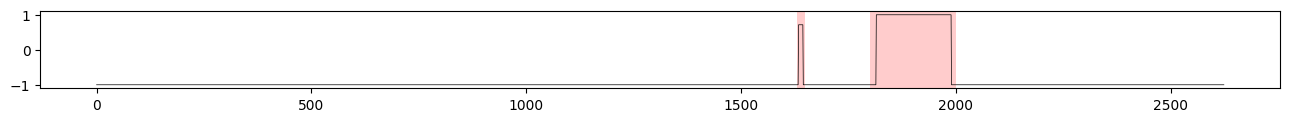

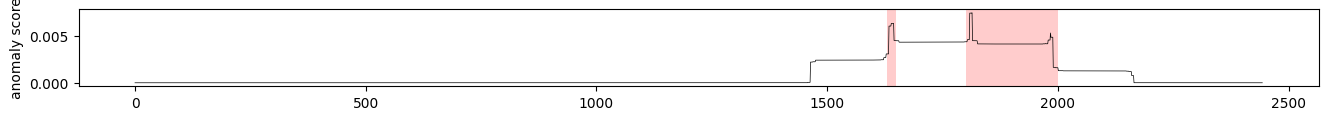

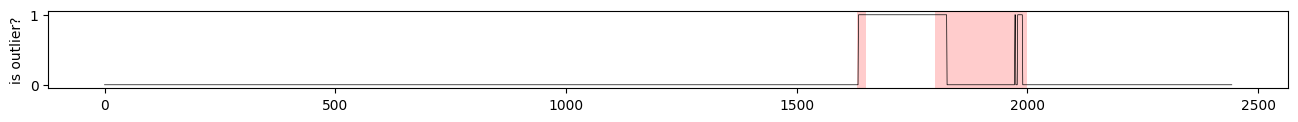

eval w/o point adjustment:
precision: 0.268 recall: 0.250 F1: 0.259 AUC: 0.913
eval with point adjustment:
precision: 0.595 recall: 1.000 F1: 0.746 AUC: 0.913
start detection for channel T-9 ..
anomaly ratio is 10.036 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 1066/1066 [00:00<00:00, 65760.59it/s]


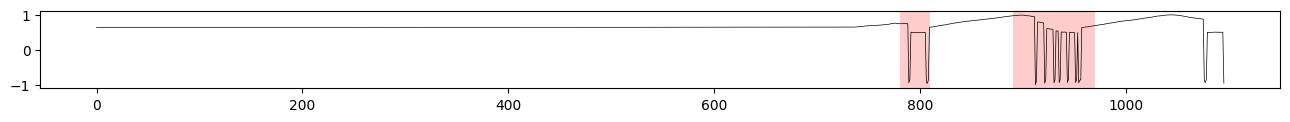

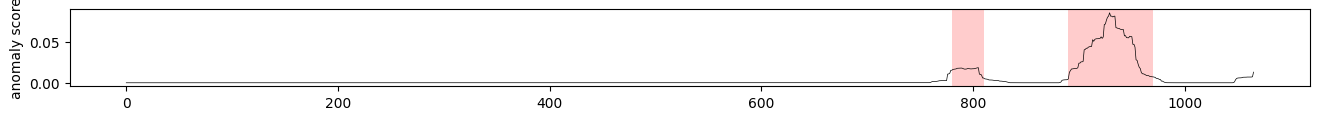

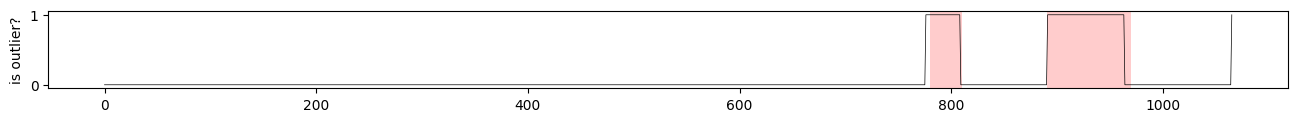

eval w/o point adjustment:
precision: 0.953 recall: 0.927 F1: 0.940 AUC: 0.958
eval with point adjustment:
precision: 0.957 recall: 1.000 F1: 0.978 AUC: 0.958
start detection for channel P-14 ..
anomaly ratio is 2.951 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 6070/6070 [00:00<00:00, 80415.37it/s]


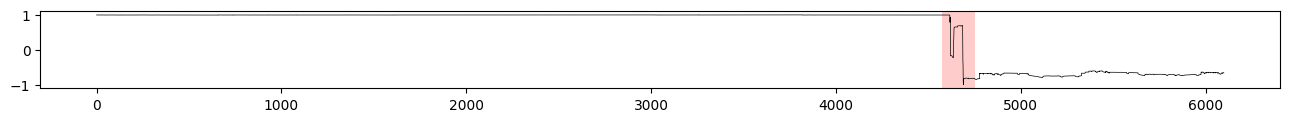

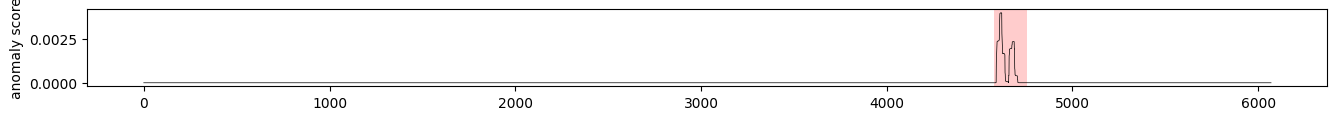

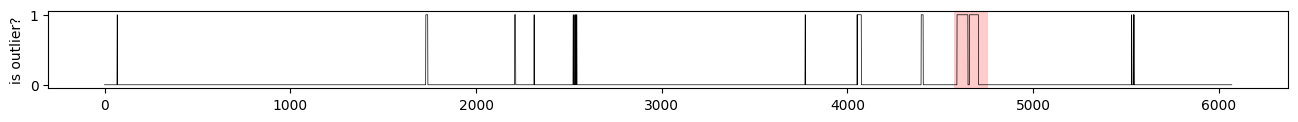

eval w/o point adjustment:
precision: 0.600 recall: 0.600 F1: 0.600 AUC: 0.684
eval with point adjustment:
precision: 0.714 recall: 1.000 F1: 0.833 AUC: 0.684
start detection for channel T-8 ..
anomaly ratio is 6.583 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 1489/1489 [00:00<00:00, 76863.57it/s]


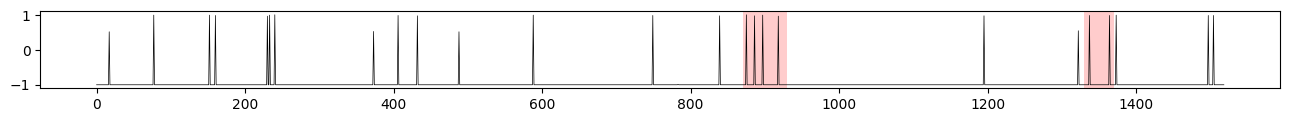

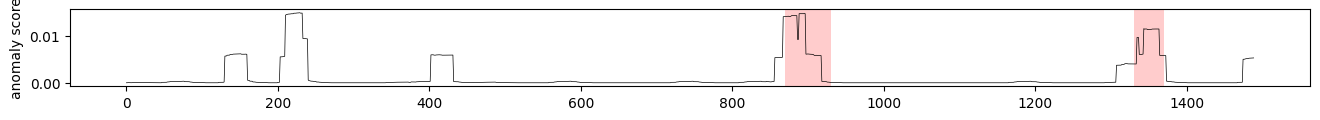

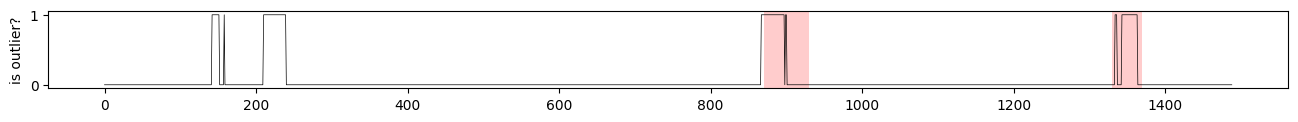

eval w/o point adjustment:
precision: 0.551 recall: 0.540 F1: 0.545 AUC: 0.869
eval with point adjustment:
precision: 0.694 recall: 1.000 F1: 0.820 AUC: 0.869
start detection for channel P-11 ..
anomaly ratio is 6.393 %.
block length is 573 time points.


Compute LOO: 100%|████████████████████████| 2962/2962 [00:00<00:00, 4307.60it/s]


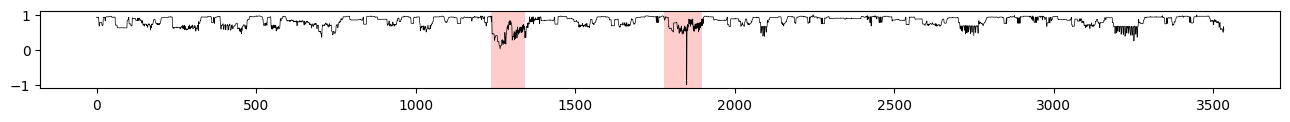

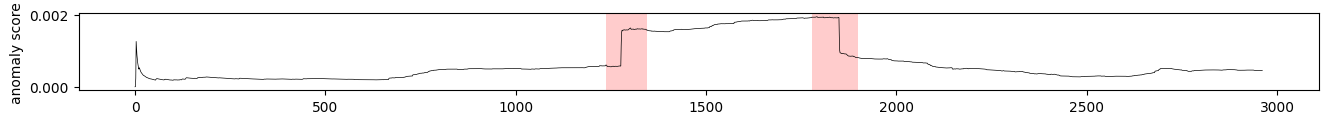

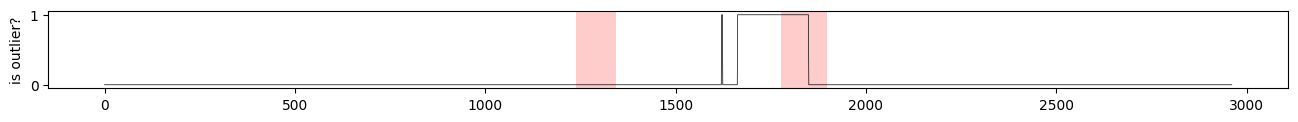

eval w/o point adjustment:
precision: 0.379 recall: 0.319 F1: 0.346 AUC: 0.680
eval with point adjustment:
precision: 0.504 recall: 0.531 F1: 0.517 AUC: 0.680
start detection for channel D-15 ..
anomaly ratio is 29.657 %.
block length is 30 time points.


Compute LOO: 100%|███████████████████████| 2128/2128 [00:00<00:00, 77275.54it/s]


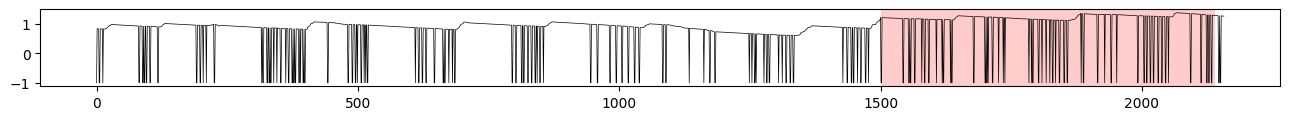

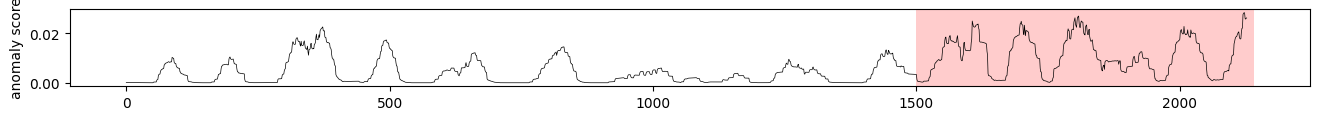

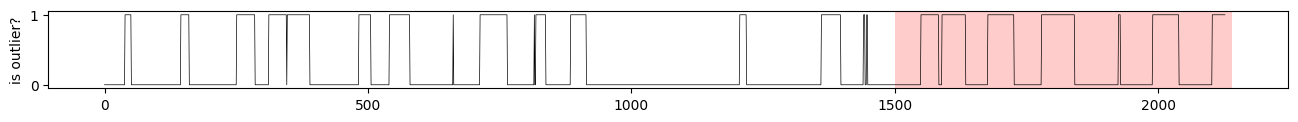

eval w/o point adjustment:
precision: 0.429 recall: 0.432 F1: 0.431 AUC: 0.619
eval with point adjustment:
precision: 0.636 recall: 1.000 F1: 0.777 AUC: 0.619
start detection for channel D-16 ..
anomaly ratio is 29.667 %.
block length is 17 time points.


Compute LOO: 100%|███████████████████████| 2174/2174 [00:00<00:00, 75677.79it/s]


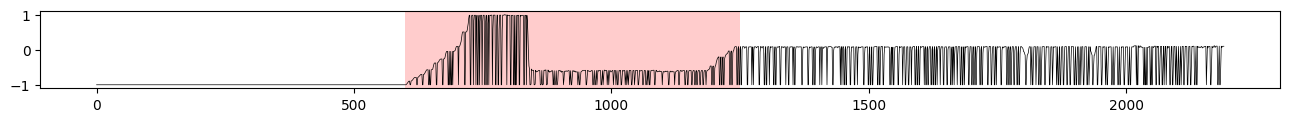

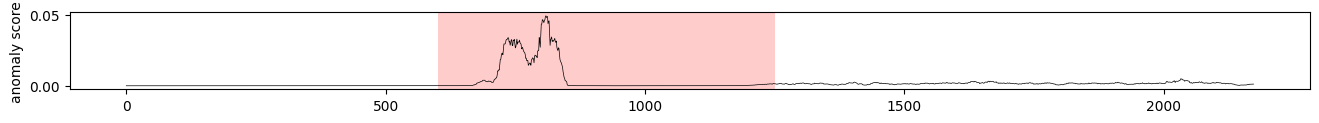

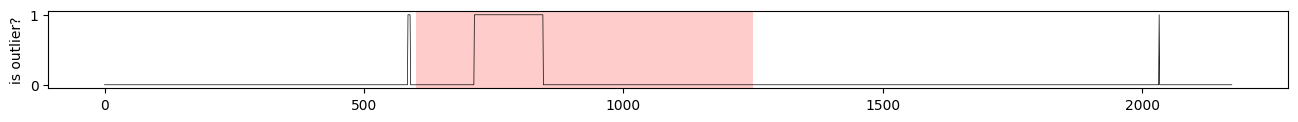

eval w/o point adjustment:
precision: 0.957 recall: 0.205 F1: 0.337 AUC: 0.665
eval with point adjustment:
precision: 0.991 recall: 1.000 F1: 0.995 AUC: 0.665
start detection for channel M-7 ..
anomaly ratio is 4.638 %.
block length is 244 time points.


Compute LOO: 100%|███████████████████████| 1912/1912 [00:00<00:00, 13816.62it/s]


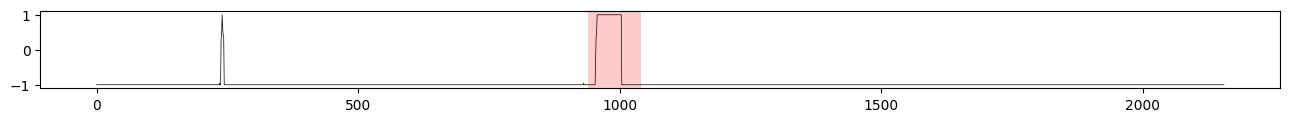

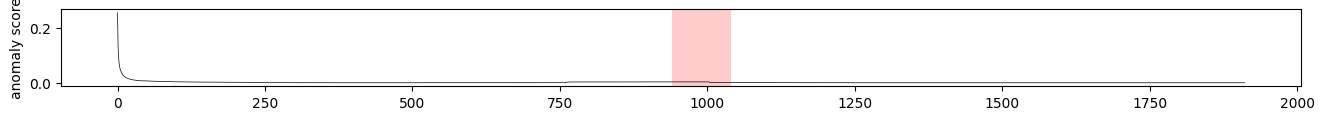

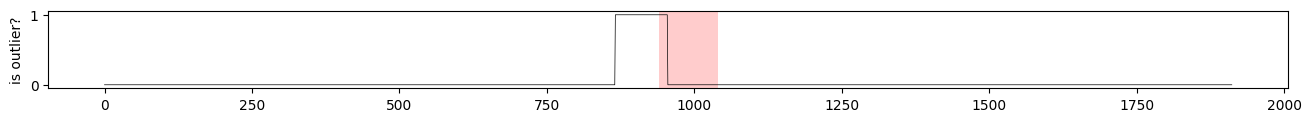

eval w/o point adjustment:
precision: 0.169 recall: 0.150 F1: 0.159 AUC: 0.615
eval with point adjustment:
precision: 0.575 recall: 1.000 F1: 0.730 AUC: 0.615
start detection for channel F-8 ..
anomaly ratio is 21.552 %.
block length is 72 time points.


Compute LOO: 100%|███████████████████████| 2415/2415 [00:00<00:00, 68302.85it/s]


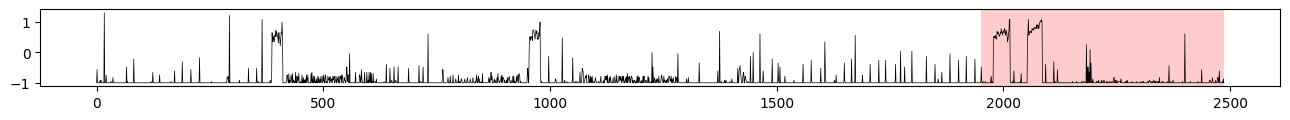

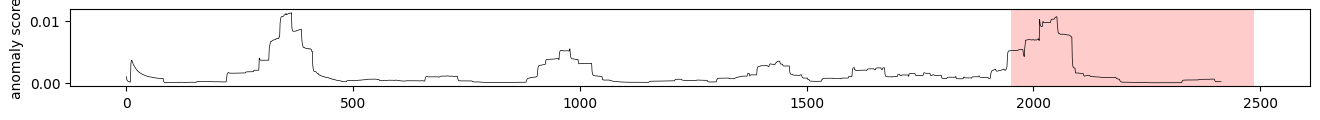

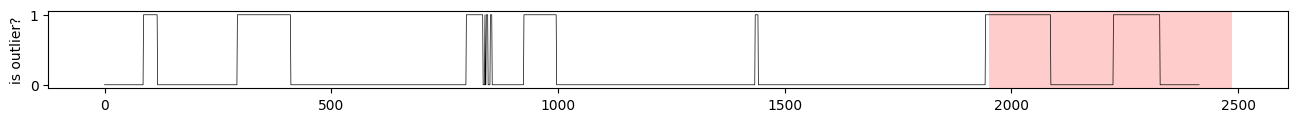

eval w/o point adjustment:
precision: 0.461 recall: 0.516 F1: 0.487 AUC: 0.698
eval with point adjustment:
precision: 0.623 recall: 1.000 F1: 0.768 AUC: 0.698


In [63]:
len_test_dict, len_anomaly_dict, len_ratio_dict = {}, {}, {}
prec_dict, rec_dict, f1_dict, auc_dict, best_f1_dict = {}, {}, {}, {}, {}
prec_adj_dict, rec_adj_dict, f1_adj_dict = {}, {}, {}

for channel in msl_df.chan_id:
    
    print(f"start detection for channel {channel} ..")

    # only use first time series 
    ts_test = np.load(data_path/"test"/f"{channel}.npy").T[0]
    seq_len = len(ts_test)
    anomaly_seqs = msl_df.loc[msl_df.chan_id == channel].anomaly_sequences.to_numpy().item()
    anomaly_seqs = re.findall(r'\d+', anomaly_seqs)
    anomaly_intervals = []
    for i in list(range(0, len(anomaly_seqs), 2)):
        anomaly_intervals.append(anomaly_seqs[i:i+2])
    anomaly_intervals = np.array(anomaly_intervals).astype(int)
    
    ground_truth = np.zeros_like(ts_test)
    
    plt.figure(figsize=(16,1))
    plt.plot(ts_test, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    
    anomaly_len = sum(ground_truth)
    anomaly_ratio = anomaly_len / seq_len
    print(f"anomaly ratio is {anomaly_ratio * 100.:.3f} %.")

    len_test_dict.update({channel: seq_len})
    len_anomaly_dict.update({channel: anomaly_len})
    len_ratio_dict.update({channel: anomaly_ratio})

    block_length = pyd.estimate_periodicity(ts_test)
    if block_length < 10 or block_length > 1000:
        block_length = 30
    print(f"block length is {block_length} time points.")
    X_train, Y_train = split_time_series(ts_test, block_length=block_length)
    matched_block_idxs = match_train_time_block_index(ts_test, X_train)
    
    lr = LinearRegression().fit(X_train, Y_train)
    beta = lr.coef_
    b = lr.intercept_
    inv_hess = len(X_train) * np.linalg.inv(X_train.T @ X_train)
    params = (beta, b, inv_hess)
    
    # compute IF for each time block
    time_block_loos = []
    for i in tqdm(range(len(X_train)), total=len(X_train), desc="Compute LOO"):
      time_block_loos.append(compute_loo_linear_approx(i, i, X_train, Y_train, X_train, Y_train, params))
    time_block_loos = np.array(time_block_loos)
    
    # compute IF for each time point
    time_point_loos = []
    for i in range(len(matched_block_idxs)):
      time_point_loos.append((time_block_loos[matched_block_idxs[i]]).mean())
    time_point_loos = np.array(time_point_loos)
    
    anomaly_scores = scale_influence_functions(time_point_loos, block_length)
    
    plt.figure(figsize=(16,1))
    loos_viz = np.ones_like(ts_test) * np.nan
    loos_viz[:len(X_train)] = time_point_loos
    plt.plot(loos_viz, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    plt.ylabel("anomaly score")
    plt.show()
    
    detected_outliers = np.zeros_like(ts_test)
    detected_outliers = anomaly_scores > np.quantile(anomaly_scores, 1-anomaly_ratio)
    
    plt.figure(figsize=(16,1))
    loos_viz = np.ones_like(ts_test) * np.nan
    loos_viz[:len(detected_outliers)] = detected_outliers
    plt.plot(loos_viz, c="k", linewidth=.5)
    for anomaly_points in anomaly_intervals:
        plt.axvspan(anomaly_points[0], anomaly_points[-1], facecolor='red', alpha=.2)
        ground_truth[anomaly_points[0]:anomaly_points[-1]] = 1.
    plt.ylabel("is outlier?")
    plt.show()
    
    print("eval w/o point adjustment:")
    prec, rec, f1, auc = eval_anomaly_detector(ground_truth[:len(detected_outliers)], detected_outliers, anomaly_scores)
    print("eval with point adjustment:")
    prec_adj, rec_adj, f1_adj, _ = eval_anomaly_detector(ground_truth[:len(detected_outliers)], detected_outliers, anomaly_scores, adjust_detection=True)

    _, _, best_f1 = eval_anomaly_detector_all_thresholds(ground_truth[:len(detected_outliers)], anomaly_scores, adjust_detection=False, verbose=False)
    
    prec_dict.update({channel: prec})
    rec_dict.update({channel: rec})
    f1_dict.update({channel: f1})
    auc_dict.update({channel: auc})
    best_f1_dict.update({channel: best_f1})

    prec_adj_dict.update({channel: prec_adj})
    rec_adj_dict.update({channel: rec_adj})
    f1_adj_dict.update({channel: f1_adj})

In [64]:
print(f"[block length = period] avg. AUC: {np.mean(list(auc_dict.values())):.3f}")
print(f"[block length = period] avg. F1 (unadjusted): {np.mean(list(f1_dict.values())):.3f}")
print(f"[block length = period] avg. F1 (point adjustment): {np.mean(list(f1_adj_dict.values())):.3f}")
print(f"[block length = period] avg. best F1: {np.mean(list(best_f1_dict.values())):.3f}")

[block length = period] avg. AUC: 0.708
[block length = period] avg. F1 (unadjusted): 0.435
[block length = period] avg. F1 (point adjustment): 0.741
[block length = period] avg. best F1: 0.463


In [65]:
msl_metrics = pd.DataFrame({
    "Num_of_Test": len_test_dict,
    "Len_of_Anomaly": len_anomaly_dict,
    "Anomaly_Ratio": len_ratio_dict,
    "Precision(w.o. Adjustment)": prec_dict,
    "Recall(w.o. Adjustment)": rec_dict,
    "F1(w.o. Adjustment)": f1_dict,
    "Precision(w. Adjustment)": prec_adj_dict,
    "Recall(w. Adjustment)": rec_adj_dict,
    "F1(w. Adjustment)": f1_adj_dict,
    "Best_F1_Score": best_f1_dict,
    "AUC": auc_dict,
})
msl_metrics.insert(0, "Dataset", msl_metrics.index)
msl_metrics.reset_index(drop = True, inplace = True)

In [68]:
msl_metrics.to_csv("./MSL_Influence_Function_results.csv") 